# **Predicting interest rates from Federal Reserve documents**
## Model Training (Vol. 6)
FE 690: Machine Learning in Finance \\
Author: Theo Dimitrasopoulos \\
Advisor: Zachary Feinstein \\

## **Setup**

### Environment

In [ ]:
# -*- coding: utf-8 -*-

# ENVIRONMENT CHECK:
import sys, os, inspect, site, pprint
# Check whether in Colab:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB == True:
  print('YES, this is a Google Colaboratory environment.')
else:
  print('NO, this is not a Google Colaboratory environment.')
print(' ')

# Python installation files:
stdlib = os.path.dirname(inspect.getfile(os))
python_version = !python --version
print('Python Standard Library is located in:\n' + stdlib)
print(' ')
print('This environment is using {}'.format(str(python_version[0])))
print(' ')
print('Local system packages are located in:')
pprint.pprint(site.getsitepackages())
print(' ')
print('Local user packages are located in:\n' + site.getusersitepackages())

## Installed packages:
#!pip list -v
#!pip list --user -v


YES, this is a Google Colaboratory environment.
 
Python Standard Library is located in:
/usr/lib/python3.6
 
This environment is using Python 3.6.9
 
Local system packages are located in:
['/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.6/dist-packages']
 
Local user packages are located in:
/root/.local/lib/python3.6/site-packages
Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argcomplete                   1.10.0          /

### Mount Google Drive

In [ ]:
# Mount Google Drive:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


### System Environment Variables

In [ ]:
if IN_COLAB:
  employment_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = '/content/drive/My Drive/Colab Notebooks/proj2/src/data/graphs/'
else:
  employment_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Employment/'
  cpi_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/CPI/'
  fed_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FEDRates/'
  fx_rates_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/FXRates/'
  gdp_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/GDP/'
  ism_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/ISM/'
  sales_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Sales/'
  treasury_data_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/MarketData/Treasury/'
  fomc_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/FOMC/'
  preprocessed_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/preprocessed/'
  train_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/train_data/'
  output_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/result/'
  keyword_lm_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/LoughranMcDonald/'
  glove_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/GloVe/'
  model_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/models/'
  graph_dir = 'C:/Users/theon/GDrive/Colab Notebooks/proj2/src/data/graphs/'


### Packages

#### Uninstall/Install Packages:

In [ ]:
#if IN_COLAB:
#  # Uninstall existing versions:
#  !pip uninstall bs4 -y
#  !pip uninstall textract -y
#  !pip uninstall numpy -y
#  !pip uninstall pandas -y
#  !pip uninstall requests -y
#  !pip uninstall tqdm -y
#  !pip uninstall nltk -y
#  !pip uninstall quandl -y
#  !pip uninstall scikit-plot -y
#  !pip uninstall seaborn -y
#  !pip uninstall sklearn -y
#  !pip uninstall torch -y
#  !pip uninstall transformers -y
#  !pip uninstall wordcloud -y
#  !pip uninstall xgboost -y
#  
#  # Install packages:
#  !pip install bs4==0.0.1
#  !pip install textract==1.6.3
#  !pip install numpy==1.19.4
#  !pip install pandas==1.1.4
#  !pip install requests==2.24.0
#  !pip install tqdm==4.51.0
#  !pip install nltk==3.5
#  !pip install quandl==3.5.3
#  !pip install scikit-plot==0.3.7
#  !pip install seaborn==0.11.0
#  !pip install sklearn==0.0
#  !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html
#  !pip install transformers==3.5.0
#  !pip install wordcloud==1.8.0
#  !pip install xgboost==1.2.1
#  os.kill(os.getpid(), 9)


#### Inspect Packages

In [ ]:
## Final working build for environment
#!pip list -v
#!pip list --user -v


Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argcomplete                   1.10.0          /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr

#### Import Packages:

In [ ]:
# Python libraries
import pprint
import datetime as dt
import re
import pickle
from tqdm.notebook import tqdm
import time
import logging
import random
from collections import defaultdict, Counter
import xgboost as xgb

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

# Import Scikit-learn models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, learning_curve, RandomizedSearchCV
import scikitplot as skplt

# Import nltk modules and download dataset
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize

# Import Pytorch modules
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler, TensorDataset)
from torch.autograd import Variable
from torch.optim import Adam, AdamW


#### Settings

In [ ]:
# General:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')


In [ ]:
# Finalize nltk setup:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

# Test pprint
pprint.pprint(sys.path)


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
## Use TPU
#if IN_COLAB:
#  assert os.environ['COLAB_TPU_ADDR'], 'Select TPU: Runtime > Change runtime type > Hardware accelerator'
#  VERSION = "20200220"
#  !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
#  !python pytorch-xla-env-setup.py --version $VERSION

In [ ]:
## Use GPU Runtime:
if IN_COLAB:
  if torch.cuda.is_available():
    torch.cuda.get_device_name(0)
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    print(gpu_info)
  else:
    print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, and then re-execute this cell.')
    os.kill(os.getpid(), 9)  


Mon Jan 25 13:39:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 300W |     10MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Set logger
logger = logging.getLogger('mylogger')
logger.setLevel(logging.DEBUG)
timestamp = time.strftime("%Y.%m.%d_%H.%M.%S", time.localtime())
fh = logging.FileHandler('log_model.txt')
fh.setLevel(logging.DEBUG)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
formatter = logging.Formatter('[%(asctime)s][%(levelname)s] ## %(message)s')
fh.setFormatter(formatter)
ch.setFormatter(formatter)
logger.addHandler(fh)
logger.addHandler(ch)

In [ ]:
# Set Random Seed
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
rand_seed = 42

In [ ]:
# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')

## **Load preprocessed data**

In [ ]:
# Load previously processed non-text data
# Load data
file = open(train_dir + 'nontext_train_small.pickle', 'rb')
train_df = pickle.load(file)
file.close()
#train_df = pd.read_csv(train_dir + 'nontext_train_small.csv')
print(train_df.shape)
train_df


(398, 10)


target  prev_decision  ...  Hsales_diff_year  Balanced_diff
date                               ...                                 
1982-10-05      -1              0  ...        -15.485275       0.003723
1982-11-16      -1             -1  ...         -9.537496       0.003723
1982-12-21       0             -1  ...         -3.116275       0.003723
1983-01-14       0              0  ...         -0.774432       0.003723
1983-01-21       0              0  ...         -0.774432       0.003723
...            ...            ...  ...               ...            ...
2020-03-15      -1             -1  ...         13.910886       0.004279
2020-03-19       0             -1  ...         13.910886       0.001426
2020-03-23       0              0  ...         13.910886       0.001426
2020-03-31       0              0  ...         13.910886       0.006092
2020-04-29       0              0  ...         12.468252       0.040295

[398 rows x 10 columns]

In [ ]:
# List of Non-text columns
nontext_columns = train_df.drop(columns=['target']).columns.tolist()
nontext_columns

['prev_decision',
 'GDP_diff_prev',
 'PMI_value',
 'Employ_diff_prev',
 'Rsales_diff_year',
 'Unemp_diff_prev',
 'Inertia_diff',
 'Hsales_diff_year',
 'Balanced_diff']

In [ ]:
# Load text data
file = open(preprocessed_dir + 'text_no_split.pickle', 'rb') # Original text
text_no_split = pickle.load(file)
file.close()
#text_no_split = pd.read_csv(preprocessed_dir + 'text_no_split.csv')
file = open(preprocessed_dir + 'text_split_200.pickle', 'rb') # Split at 200 words
text_split_200 = pickle.load(file)
file.close()
#text_split_200 = pd.read_csv(preprocessed_dir + 'text_split_200.csv')
file = open(preprocessed_dir + 'text_keyword.pickle', 'rb') # Paragraphs filtered for those having keywords
text_keyword = pickle.load(file)
file.close()
#text_keyword = pd.read_csv(preprocessed_dir + 'text_keyword.csv')

## **Check statistics of texts**

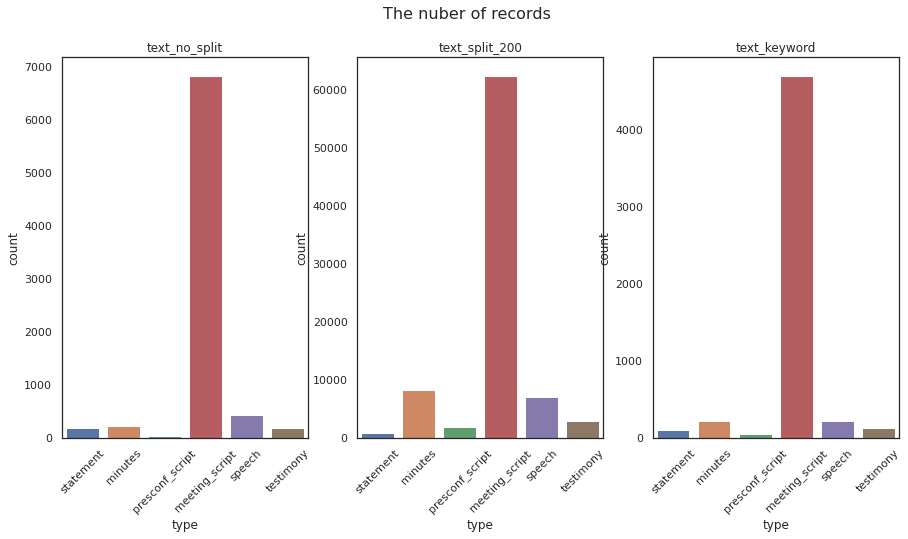

<Figure size 432x288 with 0 Axes>

In [ ]:
# Check the number of records per document type
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))
sns.countplot(x='type', data=text_no_split, ax=ax1)
ax1.set_title('text_no_split')
ax1.tick_params('x', labelrotation=45)
sns.countplot(x='type', data=text_split_200, ax=ax2)
ax2.set_title('text_split_200')
ax2.tick_params('x', labelrotation=45)
sns.countplot(x='type', data=text_keyword, ax=ax3)
ax3.set_title('text_keyword')
ax3.tick_params('x', labelrotation=45)
fig.suptitle("The nuber of records", fontsize=16)
plt.show()
plt.savefig(graph_dir + 'num_rec_per_type_text_data' + '.png')#bbox_inches='tight')

In [ ]:
text_no_split.loc[text_no_split['type'] == 'meeting_script'].head()

type  ...                                               text
463  meeting_script  ...  VOLCKER.while but it may be that itsurprised m...
464  meeting_script  ...  Without objection, it is approved. As forthe M...
465  meeting_script  ...  Well, the one that is reserveable certainlywou...
466  meeting_script  ...  Well, coming at this confidence factor from al...
467  meeting_script  ...  Mr. Chairman, Larry rescued us from the strait...

[5 rows x 11 columns]

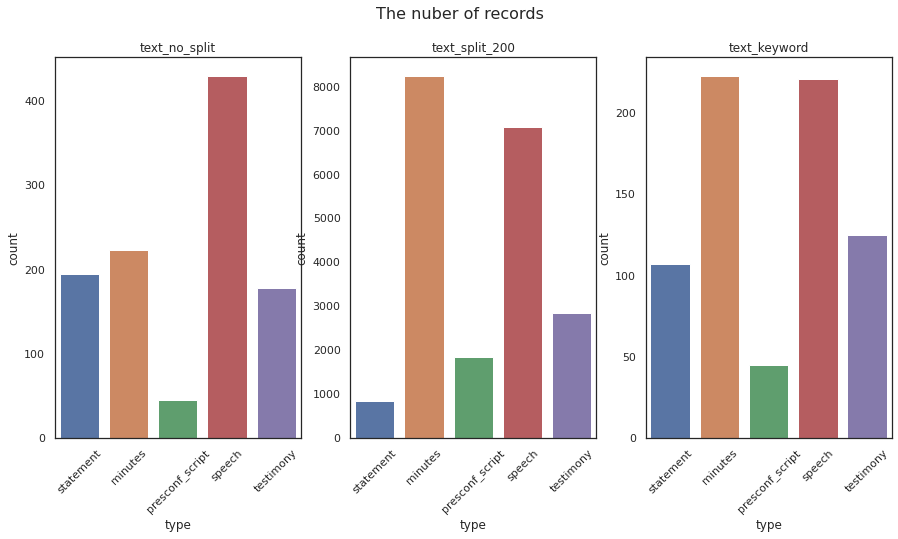

In [ ]:
# Drop meeting script data
text_no_split = text_no_split.loc[text_no_split['type'] != 'meeting_script']
text_split_200 = text_split_200.loc[text_split_200['type'] != 'meeting_script']
text_keyword = text_keyword.loc[text_keyword['type'] != 'meeting_script']

# Check the number of records per document type
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))
sns.countplot(x='type', data=text_no_split, ax=ax1)
ax1.set_title('text_no_split')
ax1.tick_params('x', labelrotation=45)
sns.countplot(x='type', data=text_split_200, ax=ax2)
ax2.set_title('text_split_200')
ax2.tick_params('x', labelrotation=45)
sns.countplot(x='type', data=text_keyword, ax=ax3)
ax3.set_title('text_keyword')
ax3.tick_params('x', labelrotation=45)
fig.suptitle("The nuber of records", fontsize=16)
plt.show()

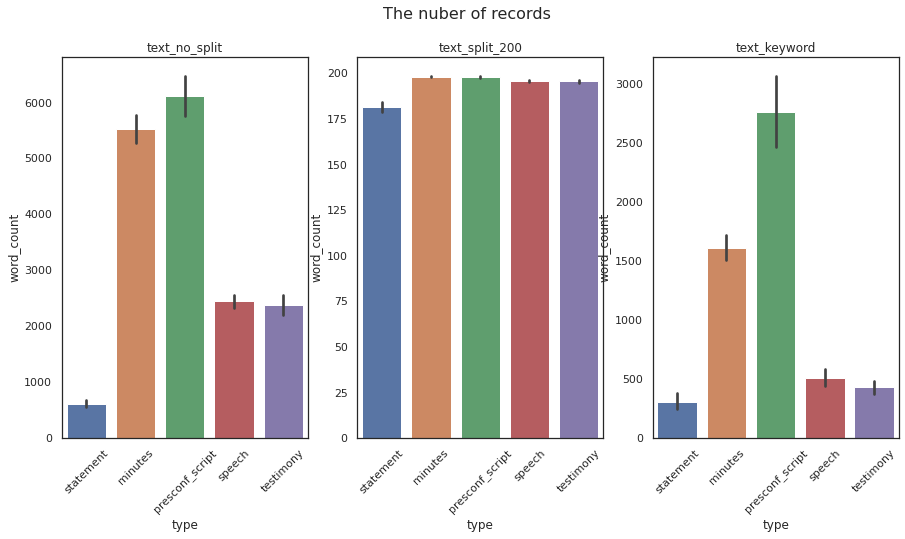

In [ ]:
# Check the number of words per document type
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))
sns.barplot(data=text_no_split, x='type', y='word_count', ax=ax1)
ax1.set_title('text_no_split')
ax1.tick_params('x', labelrotation=45)
sns.barplot(x='type', y='word_count', data=text_split_200, ax=ax2)
ax2.set_title('text_split_200')
ax2.tick_params('x', labelrotation=45)
sns.barplot(x='type', y='word_count', data=text_keyword, ax=ax3)
ax3.set_title('text_keyword')
ax3.tick_params('x', labelrotation=45)
fig.suptitle("The nuber of records", fontsize=16)
plt.show()

### Select text dataframe

In [ ]:
# Select one from the above different pre-processed data
text_df = text_no_split
text_df.reset_index(drop=True, inplace=True)
print(text_df.shape)
text_df

(1071, 11)


type  ...                                               text
0     statement  ...  Chairman Alan Greenspan announced today that t...
1     statement  ...  Chairman Alan Greenspan announced today that t...
2     statement  ...  Chairman Alan Greenspan announced today that t...
3     statement  ...  In taking the discount action, the Board appro...
4     statement  ...  In taking the discount rate action, the Board ...
...         ...  ...                                                ...
1066  testimony  ...  I would like to begin by acknowledging the tra...
1067  testimony  ...  Our country continues to face a difficult and ...
1068  testimony  ...  We meet as the pandemic continues to cause tre...
1069  testimony  ...  Chairwoman Waters, Ranking Member McHenry, and...
1070  testimony  ...  The Federal Reserve, along with others across ...

[1071 rows x 11 columns]

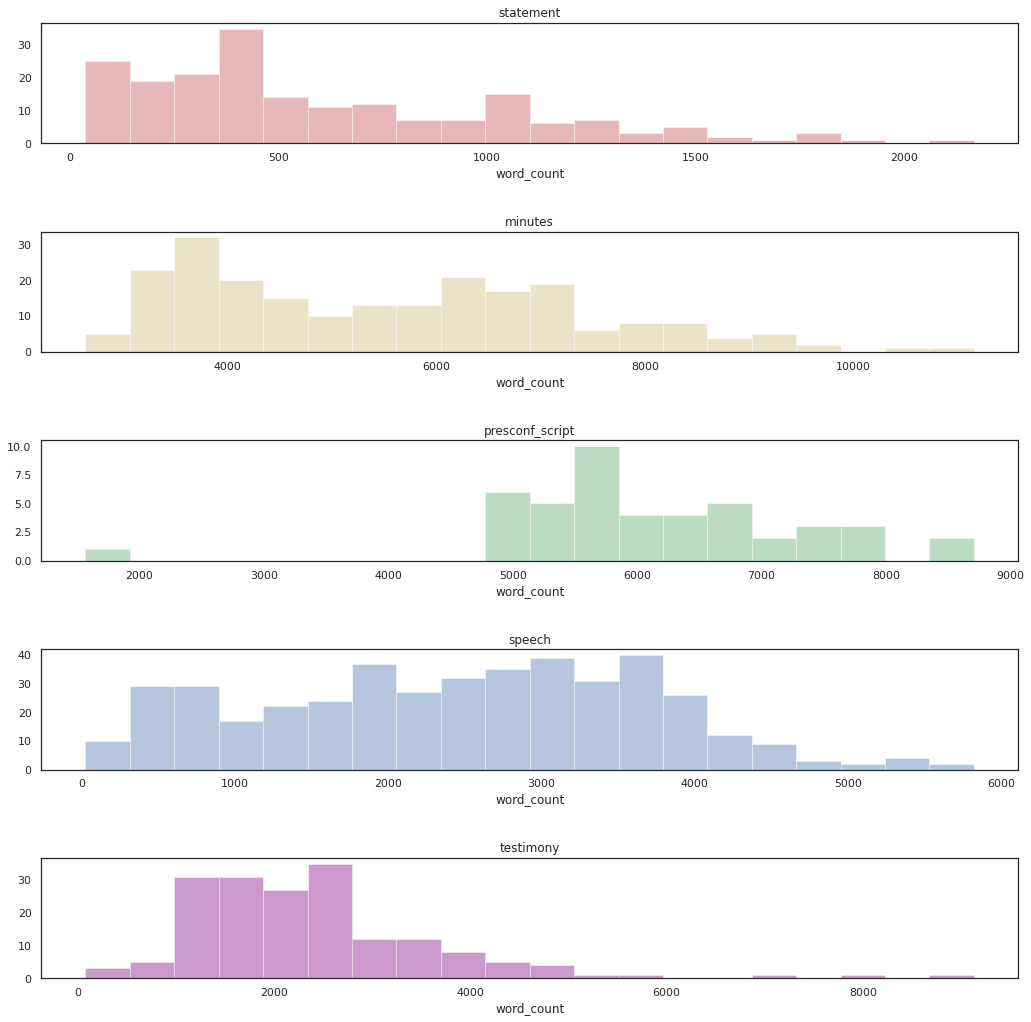

<Figure size 432x288 with 0 Axes>

In [ ]:
# Check distribution

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,15))
doc_type = 'statement'
sns.distplot(text_df.loc[text_df['type'] == doc_type]['word_count'], bins=20, ax=ax1, kde=False, color='r')
ax1.set_title(doc_type)
doc_type = 'minutes'
sns.distplot(text_df.loc[text_df['type'] == doc_type]['word_count'], bins=20, ax=ax2, kde=False, color='y')
ax2.set_title(doc_type)
doc_type = 'presconf_script'
sns.distplot(text_df.loc[text_df['type'] == doc_type]['word_count'], bins=20, ax=ax3, kde=False, color='g')
ax3.set_title(doc_type)
doc_type = 'speech'
sns.distplot(text_df.loc[text_df['type'] == doc_type]['word_count'], bins=20, ax=ax4, kde=False, color='b')
ax4.set_title(doc_type)
doc_type = 'testimony'
sns.distplot(text_df.loc[text_df['type'] == doc_type]['word_count'], bins=20, ax=ax5, kde=False, color='purple')
ax5.set_title(doc_type)

fig.tight_layout(pad=3.0)
plt.show()
plt.savefig(graph_dir + 'word_count_distribution_per_doc_type_text_df' + '.png')#bbox_inches='tight')


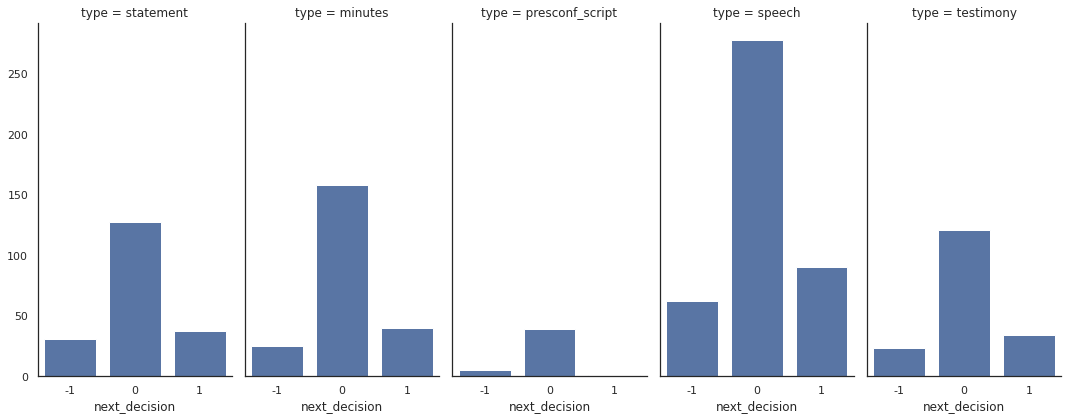

In [ ]:
# Check balance of Rate Decision
g = sns.FacetGrid(text_df, col='type', height=6, aspect=0.5)
g.map(sns.countplot, 'next_decision')
plt.show()


The label is highly biased to 0(Hold). Need to consider how to mitigate the biased data.

## **Merge text_df with train_df**

In [ ]:
from collections import defaultdict 

doc_types = text_df['type'].unique()

merged_dict = defaultdict(list)

for i, row in train_df.iterrows():
    text_rows = text_df.loc[text_df['next_meeting'] == i]
    merged_text_all = ""
    for doc_type in doc_types:
        merged_text = ""
        for text in text_rows.loc[text_rows['type'] == doc_type]['text']:
            merged_text += " " + text
        merged_dict[doc_type].append(merged_text)
        merged_text_all += merged_text
    merged_dict['text'].append(merged_text_all)
    

In [ ]:
for key in merged_dict.keys():
    train_df[key] = merged_dict[key]

train_df

target  ...                                               text
date                ...                                                   
1982-10-05      -1  ...                                                   
1982-11-16      -1  ...                                                   
1982-12-21       0  ...                                                   
1983-01-14       0  ...                                                   
1983-01-21       0  ...                                                   
...            ...  ...                                                ...
2020-03-15      -1  ...   The fundamentals of the U.S. economy remain s...
2020-03-19       0  ...   The coronavirus outbreak has harmed communiti...
2020-03-23       0  ...                                                   
2020-03-31       0  ...   The Federal Open Market Committee is taking f...
2020-04-29       0  ...   The Federal Reserve on Tuesday announced the ...

[398 rows x 16 columns]

In [ ]:
# Check if most of docs are merged

count_text, count_train = 0, 0

for doc_type in doc_types:
    count = 0
    for text in text_df.loc[text_df['type']==doc_type]['text']:
        count += len(text.split())
    print("{} words in original text for {}".format(count, doc_type))
    count_text += count
    
    count = 0
    for text in train_df[doc_type]:
        count += len(text.split())
    print("{} words in merged text for {}".format(count, doc_type))
    count_train += count

print("Total: {} words in original text".format(count_text))
print("Total: {} words in merged text".format(count_train))
print("Total: {} words in text column of merged text".format(train_df['text'].apply(lambda x: len(x.split())).sum()))

120036 words in original text for statement
117456 words in merged text for statement
1227702 words in original text for minutes
1180210 words in merged text for minutes
260491 words in original text for presconf_script
219491 words in merged text for presconf_script
1044550 words in original text for speech
1037401 words in merged text for speech
421275 words in original text for testimony
410549 words in merged text for testimony
Total: 3074054 words in original text
Total: 2965107 words in merged text
Total: 2965107 words in text column of merged text


In [ ]:
print("Before dropping: ", train_df.shape)
train_df = train_df.loc[train_df['text'] != ""]
print("After dropping: ", train_df.shape)
train_df

Before dropping:  (398, 16)
After dropping:  (237, 16)


target  ...                                               text
date                ...                                                   
1993-02-18       0  ...   The Secretary reported that advices of the el...
1993-05-18       0  ...   At the start of the meeting, the subcommittee...
1993-07-07       0  ...   The Committee then turned to a discussion of ...
1993-08-17       0  ...   The Committee then turned to a discussion of ...
1993-09-21       0  ...   Secretary's Note: Advice had been received of...
...            ...  ...                                                ...
2020-03-03      -1  ...   Information received since the Federal Open M...
2020-03-15      -1  ...   The fundamentals of the U.S. economy remain s...
2020-03-19       0  ...   The coronavirus outbreak has harmed communiti...
2020-03-31       0  ...   The Federal Open Market Committee is taking f...
2020-04-29       0  ...   The Federal Reserve on Tuesday announced the ...

[237 rows x 16 columns]

## **Explore the text**

In [ ]:
# Corpus
def create_corpus(df):
    corpus = []
    
    for x in df['text'].str.split():
        for i in x:
            corpus.append(i.lower())
    return corpus

# Returns Top X frequent stop words
def get_frequent_stop_words(corpus, top_n=10):
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return zip(*top)

# Returns Top X frequent non stop words
def get_frequent_nonstop_words(corpus, top_n=10):
    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return zip(*top)

In [ ]:
corpus = create_corpus(text_df)

In [ ]:
x, y = get_frequent_stop_words(corpus)

In [ ]:
print(x)
print(y)

('the', 'of', 'in', 'to', 'and', 'a', 'that', 'for', 'on', 'as')
(210128, 114683, 95769, 91901, 89630, 47939, 45998, 32379, 23220, 22360)


In [ ]:
x, y = get_frequent_nonstop_words(corpus)

In [ ]:
print(x)
print(y)

('economic', 'financial', 'federal', 'inflation', 'market', 'would', 'rate', 'policy', 'growth', 'committee')
(13910, 13389, 12950, 11980, 10979, 10868, 10139, 9747, 8972, 7544)


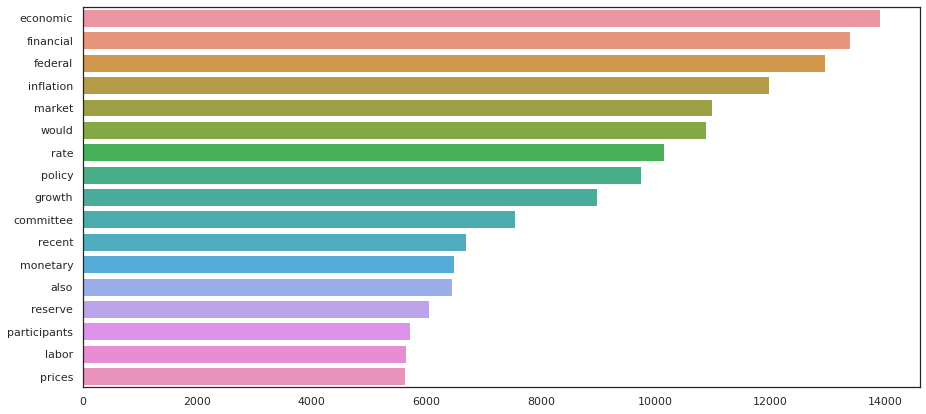

In [ ]:
# Check most frequent words which are not in stopwords
counter = Counter(corpus)
most = counter.most_common()[:60]
x, y = [], []
for word, count in most:
    if word not in stop:
        x.append(word)
        y.append(count)

plt.figure(figsize=(15,7))
sns.barplot(x=y, y=x)

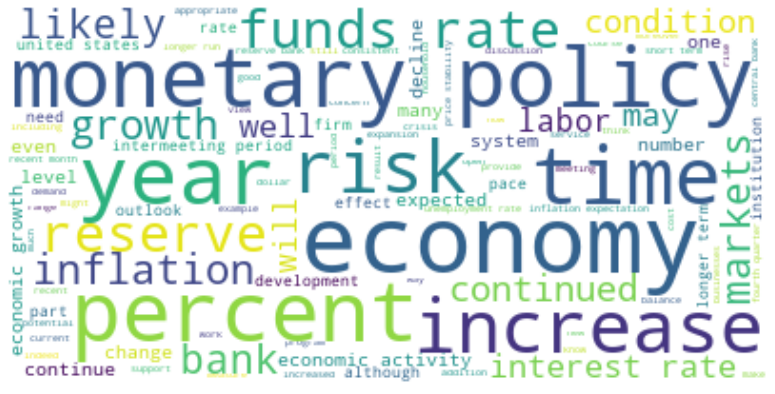

<Figure size 432x288 with 0 Axes>

In [ ]:
# Generate Word Cloud image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["federal", "federal reserve", "financial", "committee", "market", "would", "also"])

text = " ".join(corpus)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure(figsize=(15,7))
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
plt.savefig(graph_dir + 'word_cloud_image_corpus_text_df' + '.png')#bbox_inches='tight')
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


## **Add sentiment**

*Use Loughran and McDonald Sentiment Word Lists (https://sraf.nd.edu/textual-analysis/resources/) for sentiment analysis. Use the master word list, combined in two columns (sentiment and word).
<BR /> Note: This data requires license to use for commercial application. Please check their website.*

In [ ]:
# Load sentiment data
sentiment_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/proj2/src/data/LoughranMcDonald/LoughranMcDonald_SentimentWordLists_2018.csv')
print(sentiment_df.shape)
sentiment_df


(4140, 2)


sentiment            word
0         Negative         ABANDON
1         Negative       ABANDONED
2         Negative      ABANDONING
3         Negative     ABANDONMENT
4         Negative    ABANDONMENTS
...            ...             ...
4135  Constraining        STRICTER
4136  Constraining       STRICTEST
4137  Constraining        STRICTLY
4138  Constraining  UNAVAILABILITY
4139  Constraining     UNAVAILABLE

[4140 rows x 2 columns]

In [ ]:
# Make all words lower case
sentiment_df['word'] = sentiment_df['word'].str.lower()
sentiments = sentiment_df['sentiment'].unique()
sentiment_df.groupby(by=['sentiment']).count()


word
sentiment         
Constraining   184
Litigious      904
Negative      2355
Positive       354
StrongModal     19
Uncertainty    297
WeakModal       27

In [ ]:
sentiment_dict = { sentiment: sentiment_df.loc[sentiment_df['sentiment']==sentiment]['word'].values.tolist() for sentiment in sentiments}
sentiment_dict

{'Constraining': ['abide',
  'abiding',
  'bound',
  'bounded',
  'commit',
  'commitment',
  'commitments',
  'commits',
  'committed',
  'committing',
  'compel',
  'compelled',
  'compelling',
  'compels',
  'comply',
  'compulsion',
  'compulsory',
  'confine',
  'confined',
  'confinement',
  'confines',
  'confining',
  'constrain',
  'constrained',
  'constraining',
  'constrains',
  'constraint',
  'constraints',
  'covenant',
  'covenanted',
  'covenanting',
  'covenants',
  'depend',
  'dependance',
  'dependances',
  'dependant',
  'dependencies',
  'dependent',
  'depending',
  'depends',
  'dictate',
  'dictated',
  'dictates',
  'dictating',
  'directive',
  'directives',
  'earmark',
  'earmarked',
  'earmarking',
  'earmarks',
  'encumber',
  'encumbered',
  'encumbering',
  'encumbers',
  'encumbrance',
  'encumbrances',
  'entail',
  'entailed',
  'entailing',
  'entails',
  'entrench',
  'entrenched',
  'escrow',
  'escrowed',
  'escrows',
  'forbade',
  'forbid',
  

## **Analyze the tone**
*With negation without lemmatization*

In [ ]:
# Consider Negation
negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False

def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0
    tone_score = 0

    pos_words = []
    neg_words = []
 
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
    word_count = len(input_words)
     
    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])
 
    if word_count > 0:
        tone_score = 100 * (pos_count - neg_count) / word_count
    else:
        tone_score = 0
    
    results = [tone_score, word_count, pos_count, neg_count, pos_words, neg_words]
 
    return results

columns = ['tone_score', 'word_count', 'n_pos_words', 'n_neg_words', 'pos_words', 'neg_words']

In [ ]:
# Analyze tone for original text dataframe
print(text_df.shape)
tone_keyword_lm = [tone_count_with_negation_check(sentiment_dict, x) for x in tqdm(text_df['text'], total=text_df.shape[0])]
tone_keyword_lm_df = pd.DataFrame(tone_keyword_lm, columns=columns)
text_df = pd.concat([text_df, tone_keyword_lm_df.reindex(text_df.index)], axis=1)
text_df


(1071, 11)


type  ...                                          neg_words
0     statement  ...                                 [misunderstanding]
1     statement  ...                                                 []
2     statement  ...                                                 []
3     statement  ...                                                 []
4     statement  ...                                                 []
...         ...  ...                                                ...
1066  testimony  ...  [tragic, loss, hardship, crisis, closed, curta...
1067  testimony  ...  [difficult, challenging, hardship, crisis, une...
1068  testimony  ...  [hardship, crisis, decline, losses, decline, s...
1069  testimony  ...  [hardship, fallout, damage, depressed, shut, d...
1070  testimony  ...  [burden, damage, depressed, lost, lose, downtu...

[1071 rows x 17 columns]

In [ ]:
# Analyze tone for training dataframe
tone_lmdict_list = []
for doc_type in doc_types:
    tone_lmdict = [tone_count_with_negation_check(sentiment_dict, x)[0] for x in tqdm(train_df[doc_type], 
                                                                                      total=train_df.shape[0], 
                                                                                      desc=doc_type)]
    tone_lmdict_list.append(tone_lmdict)
    
train_df['tone'] = np.mean(tone_lmdict_list, axis=0)
train_df


target  ...      tone
date                ...          
1993-02-18       0  ... -0.146711
1993-05-18       0  ... -0.163716
1993-07-07       0  ... -0.267331
1993-08-17       0  ... -0.110953
1993-09-21       0  ... -0.170616
...            ...  ...       ...
2020-03-03      -1  ...  0.119968
2020-03-15      -1  ...  0.476190
2020-03-19       0  ... -0.423081
2020-03-31       0  ...  0.154639
2020-04-29       0  ...  0.080321

[237 rows x 17 columns]

In [ ]:
text_df


type  ...                                          neg_words
0     statement  ...                                 [misunderstanding]
1     statement  ...                                                 []
2     statement  ...                                                 []
3     statement  ...                                                 []
4     statement  ...                                                 []
...         ...  ...                                                ...
1066  testimony  ...  [tragic, loss, hardship, crisis, closed, curta...
1067  testimony  ...  [difficult, challenging, hardship, crisis, une...
1068  testimony  ...  [hardship, crisis, decline, losses, decline, s...
1069  testimony  ...  [hardship, fallout, damage, depressed, shut, d...
1070  testimony  ...  [burden, damage, depressed, lost, lose, downtu...

[1071 rows x 17 columns]

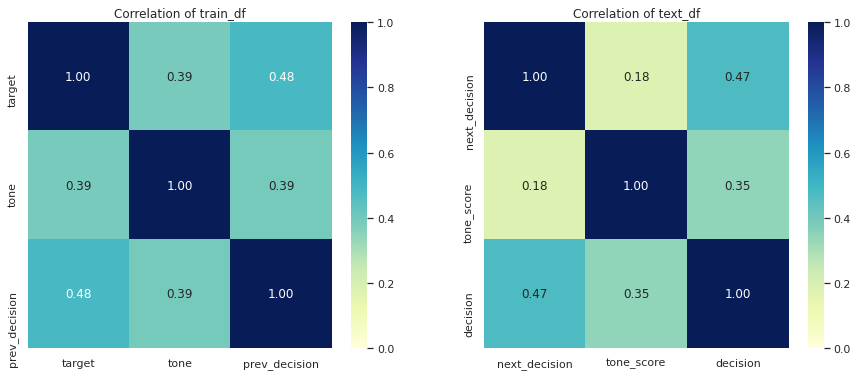

In [ ]:
# Show corelations to next_decision
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

corr_columns = ['target', 'tone', 'prev_decision']
sns.heatmap(train_df[corr_columns].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", ax=ax1, vmin=0, vmax=1)
ax1.set_title("Correlation of train_df")

corr_columns = ['next_decision', 'tone_score', 'decision']
tmp_df = pd.DataFrame()
for column in corr_columns:
    tmp_df[column] = pd.to_numeric(text_df[column], errors='coerce')
sns.heatmap(tmp_df.astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", ax=ax2, vmin=0, vmax=1)
ax2.set_title("Correlation of text_df")

plt.show()

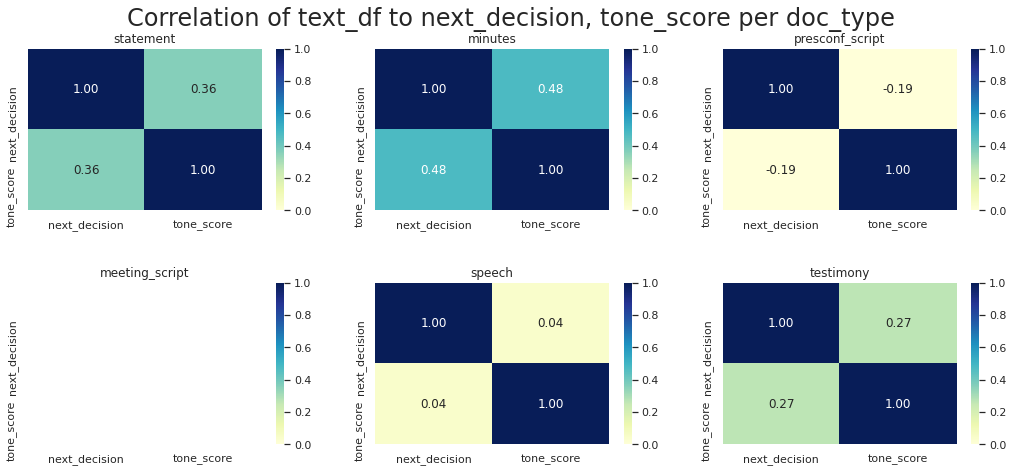

<Figure size 432x288 with 0 Axes>

In [ ]:
# Per document type
corr_columns = ['next_decision', 'tone_score', 'type']
doc_types = ['statement', 'minutes', 'presconf_script', 'meeting_script', 'speech', 'testimony']

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,7))

axes = [ax1, ax2, ax3, ax4, ax5, ax6]
df = text_df[corr_columns]
for i, doc_type in enumerate(doc_types):
    sns.heatmap(df.loc[df['type'] == doc_type].drop(columns=['type']).astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", vmin=0, vmax=1, ax=axes[i])
    axes[i].set_title(doc_type)

fig.suptitle('Correlation of text_df to next_decision, tone_score per doc_type', fontsize=24)
fig.tight_layout(pad=3.0)
plt.show()
plt.savefig(graph_dir + 'corr_per_doc_type_text_df.png', )#bbox_inches='tight')


## **Tokenize and vectorize**

In [ ]:
def lemmatize_word(word):
    wnl = nltk.stem.WordNetLemmatizer()
    return wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v')

def tokenize_df(df, col='text'):
    tokenized = []
    wnl = nltk.stem.WordNetLemmatizer()
    for text in tqdm(df[col]):
        # Filter alphabet words only and non stop words, make it loser case
        words = [word.lower() for word in word_tokenize(text) if ((word.isalpha()==1) & (word not in stop))]
        # Lemmatize words 
        tokens = [lemmatize_word(word) for word in words]
        tokenized.append(tokens)
    return tokenized


### Tokenize text_df

In [ ]:
tokenized_org = tokenize_df(text_df)
print('len(tokenized_org): ', len(tokenized_org))
print(tokenized_org[0])



len(tokenized_org):  1071
['chairman', 'alan', 'greenspan', 'announce', 'today', 'federal', 'open', 'market', 'committee', 'decide', 'increase', 'slightly', 'degree', 'pressure', 'reserve', 'position', 'the', 'action', 'expect', 'associate', 'small', 'increase', 'money', 'market', 'interest', 'rate', 'the', 'decision', 'take', 'move', 'toward', 'le', 'accommodative', 'stance', 'monetary', 'policy', 'order', 'sustain', 'enhance', 'economic', 'expansion', 'chairman', 'greenspan', 'decide', 'announce', 'action', 'immediately', 'avoid', 'misunderstand', 'committee', 'purpose', 'give', 'fact', 'first', 'firm', 'reserve', 'market', 'condition', 'committee', 'since', 'early']


In [ ]:
# Concat the list to create docs
lemma_docs_org = [" ".join(words) for words in tokenized_org]
print('len(lemma_docs_org): ', len(lemma_docs_org))
print(lemma_docs_org[0])


len(lemma_docs_org):  1071
chairman alan greenspan announce today federal open market committee decide increase slightly degree pressure reserve position the action expect associate small increase money market interest rate the decision take move toward le accommodative stance monetary policy order sustain enhance economic expansion chairman greenspan decide announce action immediately avoid misunderstand committee purpose give fact first firm reserve market condition committee since early


In [ ]:
# Create a list of all the words in the dataframe
all_words_org = [word for text in tokenized_org for word in text]
print('len(all_words_org): ', len(all_words_org))
print(all_words_org[0])

# Counter object of all the words
counts_org = Counter(all_words_org)
print('len(counts_org): ', len(counts_org))

# Create a Bag of Word, sorted by the count of words
bow_org = sorted(counts_org, key=counts_org.get, reverse=True)
print('bow_org[:20]', bow_org[:20])

# Indexing vocabrary, starting from 1.
vocab_org = {word: ii for ii, word in enumerate(counts_org, 1)}
id2vocab_org = {v: k for k, v in vocab_org.items()}

print("vocab_org['chairman']: ", vocab_org['chairman'])
print("vocab_org['market']: ", vocab_org['market'])


len(all_words_org):  1813378
chairman
len(counts_org):  28024
bow_org[:20] ['market', 'rate', 'the', 'inflation', 'economic', 'financial', 'price', 'policy', 'federal', 'bank', 'committee', 'would', 'increase', 'growth', 'year', 'in', 'continue', 'economy', 'reserve', 'i']
vocab_org['chairman']:  1
vocab_org['market']:  8


In [ ]:
# Create token id list
token_ids_org = [[vocab_org[word] for word in text_words] for text_words in tokenized_org]
print(len(token_ids_org))


1071


In [ ]:
# Add to the dataframe
text_df['tokenized'] = tokenized_org
text_df['token_ids'] = token_ids_org


In [ ]:
# # Filter by frequency of words
# # This time, switch it off as the frequency is already considered while creating the vocabrary

# freq = {}
# num_words = len(all_words)
# print('len(all_words): ', len(all_words))

# for key in counts:
#     freq[key] = counts[key]/num_words

# print('len(freq): ', len(freq))
# print(freq['rate'])

# low_cutoff = 0.000001
# high_cutoff = 20

# K_most_common, K_most_common_values = zip(*counts.most_common()[:high_cutoff])

# filtered_words = [word for word in freqs if (freqs[word] > low_cutoff and word not in K_most_common)]
# print(K_most_common)
# print('len(filtered_words): ', len(filtered_words))

### Tokenize train_df

In [ ]:
tokenized = tokenize_df(train_df)
print('len(tokenized): ', len(tokenized))
print(tokenized[0])

# Concat the list to create docs
lemma_docs = [" ".join(words) for words in tokenized]
print('len(lemma_docs): ', len(lemma_docs))
print(lemma_docs[0])

# Create a list of all the words in the dataframe
all_words = [word for text in tokenized for word in text]
print('len(all_words): ', len(all_words))
print(all_words[0])

# Counter object of all the words
counts = Counter(all_words)
print('len(counts): ', len(counts))

# Create a Bag of Word, sorted by the count of words
bow = sorted(counts, key=counts.get, reverse=True)
print('bow[:20]', bow[:20])

# Indexing vocabrary, starting from 1.
vocab = {word: ii for ii, word in enumerate(counts, 1)}
id2vocab = {v: k for k, v in vocab.items()}

# Create token id list
token_ids = [[vocab[word] for word in text_words] for text_words in tokenized]
print(len(token_ids))

# Add to the dataframe
train_df['tokenized'] = tokenized
train_df['token_ids'] = token_ids
train_df['tokenized_text'] = train_df['tokenized'].apply(lambda x: " ".join(x))



len(tokenized):  237
['the', 'secretary', 'report', 'advice', 'election', 'reserve', 'bank', 'member', 'alternate', 'member', 'federal', 'open', 'market', 'committee', 'period', 'commence', 'january', 'end', 'december', 'receive', 'individual', 'execute', 'oath', 'office', 'the', 'elect', 'member', 'alternate', 'member', 'follow', 'by', 'unanimous', 'vote', 'committee', 'elect', 'follow', 'officer', 'federal', 'open', 'market', 'committee', 'serve', 'election', 'successor', 'first', 'meet', 'committee', 'december', 'understand', 'event', 'discontinuance', 'official', 'connection', 'board', 'governor', 'federal', 'reserve', 'bank', 'would', 'cease', 'official', 'connection', 'federal', 'open', 'market', 'committee', 'by', 'unanimous', 'vote', 'william', 'mcdonough', 'margaret', 'greene', 'joan', 'lovett', 'select', 'serve', 'pleasure', 'committee', 'capacity', 'manager', 'system', 'open', 'market', 'account', 'deputy', 'manager', 'foreign', 'operation', 'system', 'open', 'market', 'acc

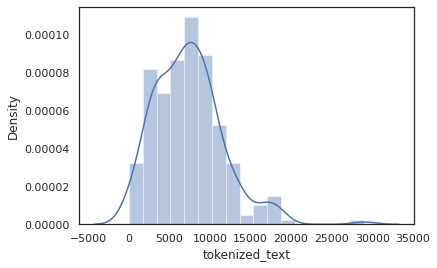

In [ ]:
sns.distplot(train_df['tokenized_text'].apply(lambda x: len(x.split())))


In [ ]:
len(token_ids[0])


4809

## **Lemmatize sentiment**

In [ ]:
# pd.get_dummies(sentiment_df, prefix=None, dtype=bool)
# sentiment_df.columns = [column.lower() for column in sentiment_df.columns]

# Lemmertize sentiment words as well
lemma_sentiment_df = sentiment_df.copy(deep=True)
lemma_sentiment_df['word'] = [lemmatize_word(word) for word in lemma_sentiment_df['word']]
# Drop duplicates
lemma_sentiment_df = sentiment_df.drop_duplicates('word')
# Sentiment list
lemma_sentiments = list(lemma_sentiment_df['sentiment'].unique())


In [ ]:
lemma_sentiment_df.groupby(by=['sentiment']).count()


word
sentiment         
Constraining   145
Litigious      750
Negative      2355
Positive       354
StrongModal     15
Uncertainty    257

## **Tfidf** 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf(sentiment_words, docs):
    """
    Generate TFIDF values from documents for a certain sentiment

    Parameters
    ----------
    sentiment_words: Pandas Series
        Words that signify a certain sentiment
    docs : list of str
        List of documents used to generate bag of words

    Returns
    -------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.
    """
    vectorizer = TfidfVectorizer(analyzer='word', vocabulary=sentiment_words)
    tfidf = vectorizer.fit_transform(docs)
    features = vectorizer.get_feature_names()
    
    return tfidf.toarray()


### Text dataframe

In [ ]:
# Using the get_tfidf function, let's generate the TFIDF values for all the documents.
sentiment_tfidf_org = {
        sentiment: get_tfidf(lemma_sentiment_df.loc[lemma_sentiment_df['sentiment'] == sentiment]['word'], lemma_docs_org)
        for sentiment in lemma_sentiments}

print(len(sentiment_tfidf_org['Negative']))
print(len(sentiment_tfidf_org['Negative'][0]))


1071
2355


In [ ]:
text_df.shape


(1071, 19)

In [ ]:
for sentiment in lemma_sentiments:
    text_df['tfidf_' + sentiment] = list(sentiment_tfidf_org[sentiment])
    
text_df


type  ...                                 tfidf_Constraining
0     statement  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1     statement  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2     statement  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3     statement  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4     statement  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...         ...  ...                                                ...
1066  testimony  ...  [0.0, 0.0, 0.0, 0.0, 0.689603541677207, 0.0, 0...
1067  testimony  ...  [0.0, 0.0, 0.0, 0.0, 0.7618523947878602, 0.0, ...
1068  testimony  ...  [0.0, 0.0, 0.0, 0.0, 0.6174134983199082, 0.0, ...
1069  testimony  ...  [0.0, 0.0, 0.0, 0.0, 0.9787956746351656, 0.0, ...
1070  testimony  ...  [0.0, 0.0, 0.0, 0.0, 0.9351598400063627, 0.0, ...

[1071 rows x 25 columns]

### Train dataframe

In [ ]:
# Using the get_tfidf function, let's generate the TFIDF values for all the documents.
sentiment_tfidf = {
        sentiment: get_tfidf(lemma_sentiment_df.loc[lemma_sentiment_df['sentiment'] == sentiment]['word'], lemma_docs)
        for sentiment in lemma_sentiments}

print(len(sentiment_tfidf['Negative']))
print(len(sentiment_tfidf['Negative'][0]))

for sentiment in lemma_sentiments:
    train_df['tfidf_' + sentiment] = list(sentiment_tfidf[sentiment])
    
train_df


237
2355


target  ...                                 tfidf_Constraining
date                ...                                                   
1993-02-18       0  ...  [0.0, 0.0, 0.0, 0.0, 0.06388595997561217, 0.18...
1993-05-18       0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.07546256325889251,...
1993-07-07       0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.10621491001362024,...
1993-08-17       0  ...  [0.0, 0.0, 0.0, 0.0, 0.07677853490184394, 0.0,...
1993-09-21       0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.07608224949378356,...
...            ...  ...                                                ...
2020-03-03      -1  ...  [0.0, 0.0, 0.0, 0.0, 0.14549780533449438, 0.13...
2020-03-15      -1  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.31226766266868744,...
2020-03-19       0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2020-03-31       0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2020-04-29       0  ...  [0.0, 0.0, 0.0, 0.0, 0.7218889274991728, 0.692...

[237 rows x 26 columns]

## **Cosine Similarity**
*Using the TFIDF values, we'll calculate the cosine similarity and plot it over time. Implement `get_cosine_similarity` to return the cosine similarities between each tick in time. Since the input, `tfidf_matrix`, is a TFIDF vector for each time period in order, you just need to computer the cosine similarities for each neighboring vector.*

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(tfidf_matrix):
    """
    Get cosine similarities for each neighboring TFIDF vector/document

    Parameters
    ----------
    tfidf : 2-d Numpy Ndarray of float
        TFIDF sentiment for each document
        The first dimension is the document.
        The second dimension is the word.

    Returns
    -------
    cosine_similarities : list of float
        Cosine similarities for neighboring documents
    """
    #print(tfidf_matrix)
    return [cosine_similarity(u.reshape(1,-1), v.reshape(1,-1))[0][0].tolist() for u, v in zip(tfidf_matrix, tfidf_matrix[1:])]


In [ ]:
cosine_similarities = {
    sentiment_name: get_cosine_similarity(sentiment_values) 
    for sentiment_name, sentiment_values in sentiment_tfidf.items()}

print(len(cosine_similarities['Negative']))


236


In [ ]:
for sentiment in lemma_sentiments:
    # Add 0 to the first element as there is no comparison available to a previous value
    cosine_similarities[sentiment].insert(0, 0)
    train_df['cos_sim_' + sentiment] = cosine_similarities[sentiment]
    
train_df


target  prev_decision  ...  cos_sim_StrongModal  cos_sim_Constraining
date                               ...                                           
1993-02-18       0              0  ...             0.000000              0.000000
1993-05-18       0              0  ...             0.000000              0.912614
1993-07-07       0              0  ...             0.000000              0.957521
1993-08-17       0              0  ...             0.648609              0.949335
1993-09-21       0              0  ...             0.333053              0.924057
...            ...            ...  ...                  ...                   ...
2020-03-03      -1              0  ...             0.755689              0.780382
2020-03-15      -1             -1  ...             0.593570              0.715387
2020-03-19       0             -1  ...             0.193855              0.410276
2020-03-31       0              0  ...             0.000000              0.590735
2020-04-29       0              0  ...             0.000000              0.000000

[237 rows x 32 columns]

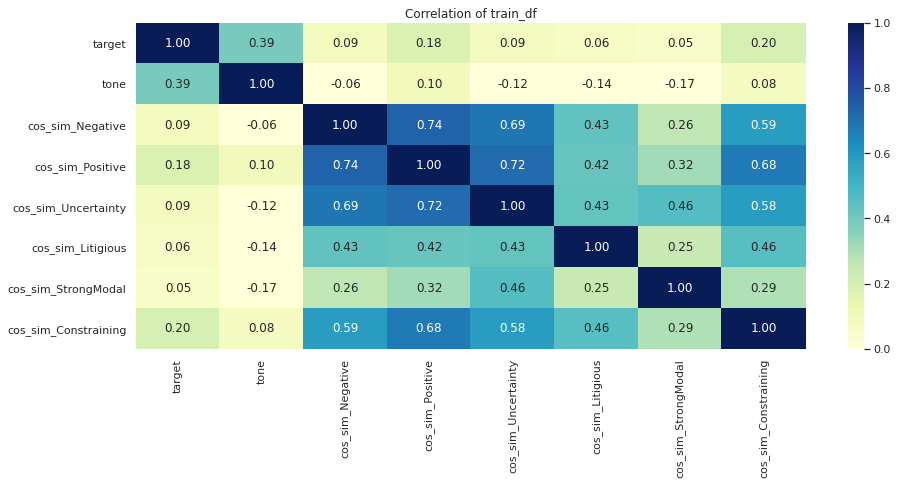

<Figure size 432x288 with 0 Axes>

In [ ]:
# Show corelations to target
fig, ax = plt.subplots(figsize=(15,6))
corr_columns = ['target', 'tone', 'cos_sim_Negative', 'cos_sim_Positive', 'cos_sim_Uncertainty', 'cos_sim_Litigious', 'cos_sim_StrongModal', 'cos_sim_Constraining']
sns.heatmap(train_df[corr_columns].astype(float).corr(), cmap="YlGnBu", annot=True, fmt=".2f", ax=ax, vmin=0, vmax=1)
ax.set_title("Correlation of train_df")
plt.show()
plt.savefig(graph_dir + 'corr_per_doc_type_train_df.png', )#bbox_inches='tight')


### Convert target class for classification

In [ ]:
def convert_class(x):
    if x == 1:
        return 2
    elif x == 0:
        return 1
    elif x == -1:
        return 0


In [ ]:
train_df['target'] = train_df['target'].map(convert_class)


In [ ]:
train_df['prev_decision'] = train_df['prev_decision'].map(convert_class)


## **Modeling and Training**

### Setup

In [ ]:
# Use Stratified KFold Cross Validation
# Training data is not so many, keep n_split <= 5
kfold = StratifiedKFold(n_splits=3)
kfold


StratifiedKFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
def metric(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc, f1

scoring = {'Accuracy': 'accuracy', 'F1': 'f1_macro'}
refit = 'F1'

In [ ]:
def train_grid_search(estimator, param_grid, scoring, refit, cv=5, verbose=1, plot=True):
    model = GridSearchCV(estimator, param_grid=param_grid, cv=cv, scoring=scoring, verbose=verbose, 
                         refit=refit, n_jobs=-1, return_train_score=True)
    model.fit(X_train, Y_train)
    
    results = model.cv_results_
    best_estimator = model.best_estimator_
    train_scores = results['mean_train_' + refit]
    test_scores = results['mean_test_' + refit]
    train_time = results['mean_fit_time']
    
    print("Best Score: ", model.best_score_)
    print("Best Param: ", model.best_params_)
    
    pred_train = best_estimator.predict(X_train)
    pred_test = best_estimator.predict(X_test)

    acc, f1 = metric(Y_train, pred_train)
    logger.info('Training - acc: %.8f, f1: %.8f' % (acc, f1))
    acc, f1 = metric(Y_test, pred_test)
    logger.info('Test - acc: %.8f, f1: %.8f' % (acc, f1))
        
    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle("GridSearchCV Result", fontsize=20)
        
        ### First plot ###
        ax1.plot(train_scores, test_scores, 'bo')
        ax1.set_title("Train Score v.s. Test Score", fontsize=16)
        ax1.set_xlabel("Train Score")
        ax1.set_ylabel("Test Score")
        ax1.set_xlim(0, 1)
        ax1.set_ylim(0, 1)
        ax1.grid(True)
        
        ### Second plot ###
        x_param = list(param_grid.keys())[0]
        x_param_min = np.min(list(param_grid.values())[0])
        x_param_max = np.max(list(param_grid.values())[0])

        ax2.set_title("Score over the first param", fontsize=16)
        ax2.set_xlabel(x_param)
        ax2.set_ylabel("Score")
        ax2.set_xlim(x_param_min, x_param_max)
        ax2.set_ylim(0, 1)

        # Get the regular numpy array from the MaskedArray
        X_axis = np.array(results['param_' + x_param].data, dtype=float)

        for scorer, color in zip(sorted(scoring), ['r', 'g']):
            for sample, style in (('train', '--'), ('test', '-')):
                sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
                sample_score_std = results['std_%s_%s' % (sample, scorer)]
                ax2.fill_between(X_axis, sample_score_mean - sample_score_std,
                                sample_score_mean + sample_score_std,
                                alpha=0.1 if sample == 'test' else 0, color=color)
                ax2.plot(X_axis, sample_score_mean, style, color=color,
                        alpha=1 if sample == 'test' else 0.7,
                        label="%s (%s)" % (scorer, sample.capitalize()))

            best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
            best_score = results['mean_test_%s' % scorer][best_index]

            # Plot a dotted vertical line at the best score for that scorer marked by x
            ax2.plot([X_axis[best_index], ] * 2, [0, best_score],
                    linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

            # Annotate the best score for that scorer
            ax2.annotate("%0.2f" % best_score,
                        (X_axis[best_index], best_score + 0.005))

        ax2.legend(loc="best")
        ax2.grid(False)
        
        ### Third plot (Learning Curve) ###
        # Calculate learning curve (Accuracy)
        lc_acc_train_sizes, lc_acc_train_scores, lc_acc_test_scores = learning_curve(
            best_estimator, X_train, Y_train, cv=kfold, n_jobs=-1, scoring=scoring['Accuracy'], 
            train_sizes=np.linspace(.1, 1.0, 5))
        lc_acc_train_mean = np.mean(lc_acc_train_scores, axis=1)
        lc_acc_train_std = np.std(lc_acc_train_scores, axis=1)
        lc_acc_test_mean = np.mean(lc_acc_test_scores, axis=1)
        lc_acc_test_std = np.std(lc_acc_test_scores, axis=1)
        
        # Calculate learning curve (F1 Score)
        lc_f1_train_sizes, lc_f1_train_scores, lc_f1_test_scores = learning_curve(
            best_estimator, X_train, Y_train, cv=kfold, n_jobs=-1, scoring=scoring['F1'], 
            train_sizes=np.linspace(.1, 1.0, 5))
        lc_f1_train_mean = np.mean(lc_f1_train_scores, axis=1)
        lc_f1_train_std = np.std(lc_f1_train_scores, axis=1)
        lc_f1_test_mean = np.mean(lc_f1_test_scores, axis=1)
        lc_f1_test_std = np.std(lc_f1_test_scores, axis=1)
        
        ax3.set_title("Learning Curve", fontsize=16)
        ax3.set_xlabel("Training examples")
        ax3.set_ylabel("Score")

        # Plot learning curve (Accuracy)
        ax3.fill_between(lc_acc_train_sizes, 
                         lc_acc_train_mean - lc_acc_train_std,
                         lc_acc_train_mean + lc_acc_train_std, alpha=0.1, color="r")
        ax3.fill_between(lc_acc_train_sizes, 
                         lc_acc_test_mean - lc_acc_test_std,
                         lc_acc_test_mean + lc_acc_test_std, alpha=0.1, color="r")
        ax3.plot(lc_acc_train_sizes, lc_acc_train_mean, 'o--', color="r",
                 label="Accuracy (Train)")
        ax3.plot(lc_acc_train_sizes, lc_acc_test_mean, 'o-', color="r",
                 label="Accuracy (Test)")
        
        # Plot learning curve (F1 Score)
        ax3.fill_between(lc_f1_train_sizes, 
                         lc_f1_train_mean - lc_f1_train_std,
                         lc_f1_train_mean + lc_f1_train_std, alpha=0.1, color="g")
        ax3.fill_between(lc_f1_train_sizes, 
                         lc_f1_test_mean - lc_f1_test_std,
                         lc_f1_test_mean + lc_f1_test_std, alpha=0.1, color="g")
        ax3.plot(lc_f1_train_sizes, lc_f1_train_mean, 'o--', color="g",
                 label="F1 (Train)")
        ax3.plot(lc_f1_train_sizes, lc_f1_test_mean, 'o-', color="g",
                 label="F1 (Test)")

        ax3.legend(loc="best")
        ax3.grid(True)
        
        plt.tight_layout(pad=3.0)
        plt.show()
        plt.savefig(graph_dir + 'tgs_learning_curve_full' + '.png')#, bbox_inches='tight')

        ### Confusion Matrix ###
        class_names = ['Lower', 'Hold', 'Raise']
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle("Confusion Matrix", fontsize=20)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax1)
        ax1.set_title("Train Data: Actual Count")
        ax1.grid(False)
        
        plot_confusion_matrix(best_estimator, X_train, Y_train, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax2)
        ax2.set_title=("Train Data: Normalized")
        ax2.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize=None, ax=ax3)
        ax3.set_title=("Test Data: Actual Count")
        ax3.grid(False)
        
        plot_confusion_matrix(best_estimator, X_test, Y_test, display_labels=class_names, 
                              cmap=plt.cm.Blues, normalize='all', ax=ax4)
        ax4.set_title("Test Data: Normalized")
        ax4.grid(False)
        
        plt.tight_layout(pad=3.0)
        plt.show()
        plt.savefig(graph_dir + 'conf_mats_full' + '.png')#, bbox_inches='tight')

    return model


### I. Cosin Similarity


#### Train and Test Data

In [ ]:
train_df.columns


Index(['target', 'prev_decision', 'GDP_diff_prev', 'PMI_value',
       'Employ_diff_prev', 'Rsales_diff_year', 'Unemp_diff_prev',
       'Inertia_diff', 'Hsales_diff_year', 'Balanced_diff', 'statement',
       'minutes', 'presconf_script', 'speech', 'testimony', 'text', 'tone',
       'tokenized', 'token_ids', 'tokenized_text', 'tfidf_Negative',
       'tfidf_Positive', 'tfidf_Uncertainty', 'tfidf_Litigious',
       'tfidf_StrongModal', 'tfidf_Constraining', 'cos_sim_Negative',
       'cos_sim_Positive', 'cos_sim_Uncertainty', 'cos_sim_Litigious',
       'cos_sim_StrongModal', 'cos_sim_Constraining'],
      dtype='object')

In [ ]:
# X and Y data used
Y_data = train_df['target']
X_data = train_df[nontext_columns + ['tone', 'cos_sim_Negative', 'cos_sim_Positive', 'cos_sim_Uncertainty', 
                                     'cos_sim_Litigious', 'cos_sim_StrongModal', 'cos_sim_Constraining']]

# Train test split (Shuffle=False will make the test data for the most recent ones)
X_train, X_test, Y_train, Y_test = \
model_selection.train_test_split(X_data.values, Y_data.values, test_size=0.2, shuffle=True)

#### Train Model

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
[2021-01-25 13:48:02,058][INFO] ## Training - acc: 0.98941799, f1: 0.98723232
[2021-01-25 13:48:02,060][INFO] ## Test - acc: 0.75000000, f1: 0.58127358


Best Score:  0.5907814855184087
Best Param:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 14}


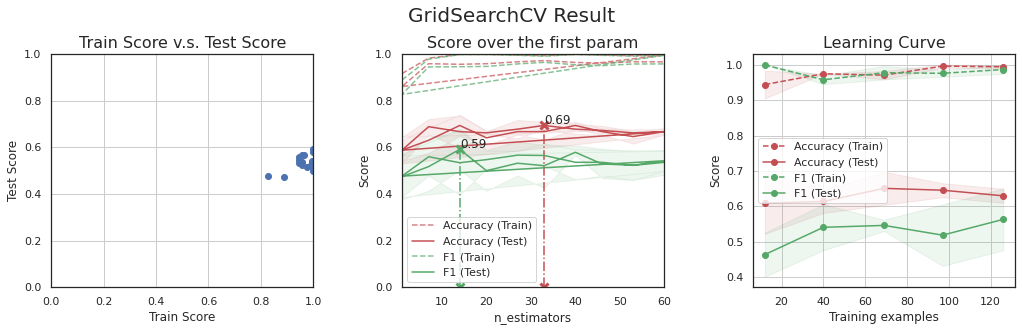

<Figure size 432x288 with 0 Axes>

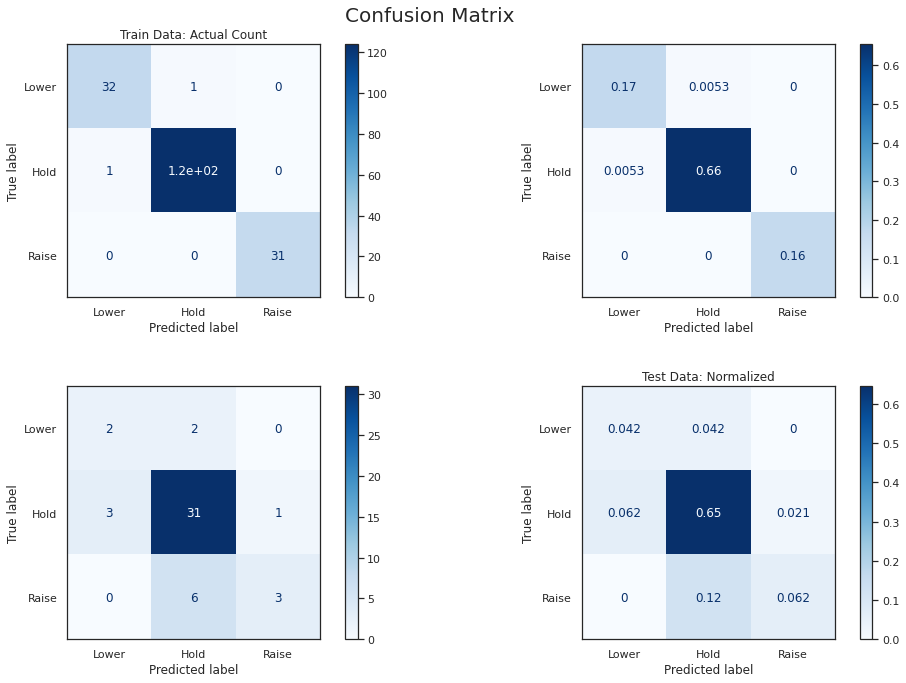

<Figure size 432x288 with 0 Axes>

In [ ]:
# Random Forest
rf_clf = RandomForestClassifier()

# Perform Grid Search
param_grid = {'n_estimators': np.linspace(1, 60, 10, dtype=int),
              'min_samples_split': [3, 10],
              'min_samples_leaf': [3],
              'max_features': [7],
              'max_depth': [None],
              'criterion': ['gini'],
              'bootstrap': [False]}

rf_model = train_grid_search(rf_clf, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
rf_best = rf_model.best_estimator_

Text(0.5, 1.0, 'Feature importance')

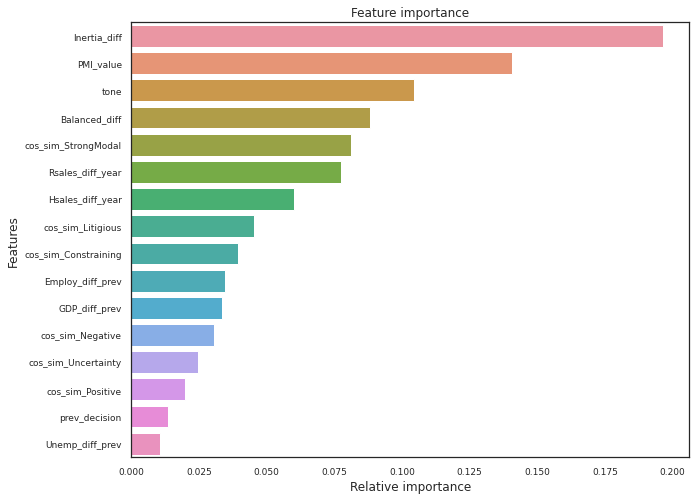

In [ ]:
# Feature Importance
fig, ax = plt.subplots(figsize=(10,8))

indices = np.argsort(rf_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_data.columns[indices][:40], x=rf_best.feature_importances_[indices][:40] , orient='h', ax=ax)
g.set_xlabel("Relative importance", fontsize=12)
g.set_ylabel("Features", fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Feature importance")


### II. Tfidf
*Use Tfidf instead of cosin similarity:*

#### Train and Test Data

In [ ]:
train_df

target  prev_decision  ...  cos_sim_StrongModal  cos_sim_Constraining
date                               ...                                           
1993-02-18       1              1  ...             0.000000              0.000000
1993-05-18       1              1  ...             0.000000              0.912614
1993-07-07       1              1  ...             0.000000              0.957521
1993-08-17       1              1  ...             0.648609              0.949335
1993-09-21       1              1  ...             0.333053              0.924057
...            ...            ...  ...                  ...                   ...
2020-03-03       0              1  ...             0.755689              0.780382
2020-03-15       0              0  ...             0.593570              0.715387
2020-03-19       1              0  ...             0.193855              0.410276
2020-03-31       1              1  ...             0.000000              0.590735
2020-04-29       1              1  ...             0.000000              0.000000

[237 rows x 32 columns]

In [ ]:
vocabulary=sentiment_dict['Negative']+sentiment_dict['Positive']
vocabulary

['abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abdicated',
 'abdicates',
 'abdicating',
 'abdication',
 'abdications',
 'aberrant',
 'aberration',
 'aberrational',
 'aberrations',
 'abetting',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'abolish',
 'abolished',
 'abolishes',
 'abolishing',
 'abrogate',
 'abrogated',
 'abrogates',
 'abrogating',
 'abrogation',
 'abrogations',
 'abrupt',
 'abruptly',
 'abruptness',
 'absence',
 'absences',
 'absenteeism',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abusively',
 'abusiveness',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accusation',
 'accusations',
 'accuse',
 'accused',
 'accuses',
 'accusing',
 'acquiesce',
 'acquiesced',
 'acquiesces',
 'acquiescing',
 'acquit',
 'acquits',
 'acquittal',
 'acquittals',
 'acquitted',
 'acquitting',
 'adulterate',
 'adulterated',
 'adulterating',
 'adulteration',
 'adulterations',
 'adversarial',
 'adversaries',
 

In [ ]:
# X and Y data used
Y_data = train_df['target']
X_data = train_df[nontext_columns + ['tone', 'tokenized_text']]

# Train test split (Shuffle=False will make the test data for the most recent ones)
X_train, X_test, Y_train, Y_test = \
model_selection.train_test_split(X_data.values, Y_data.values, test_size=0.2, shuffle=True)

In [ ]:
import scipy
def get_numeric_data(x):
    return [record[:-2].astype(float) for record in x]

def get_text_data(x):
    return [record[-1] for record in x]

from sklearn.preprocessing import FunctionTransformer
transfomer_numeric = FunctionTransformer(get_numeric_data)
transformer_text = FunctionTransformer(get_text_data)


#### Train Model

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   38.2s finished


Best Score:  0.3356701786710447
Best Param:  {'clf__bootstrap': False, 'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 7, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 10, 'clf__n_estimators': 1}


[2021-01-25 13:49:59,631][INFO] ## Training - acc: 0.69312169, f1: 0.51855959
[2021-01-25 13:49:59,633][INFO] ## Test - acc: 0.72916667, f1: 0.36099391


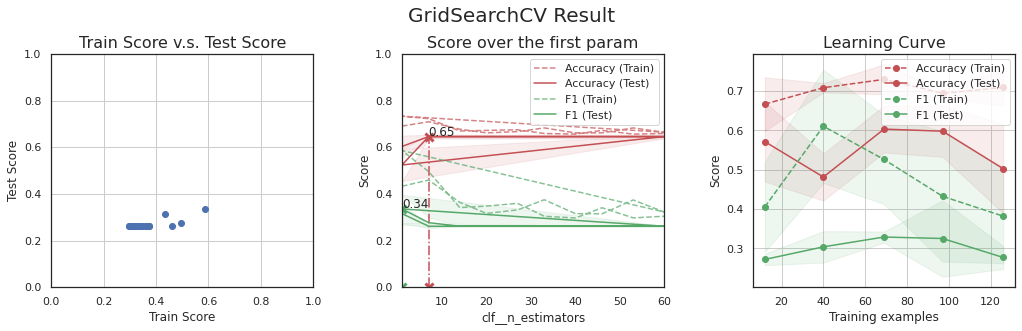

<Figure size 432x288 with 0 Axes>

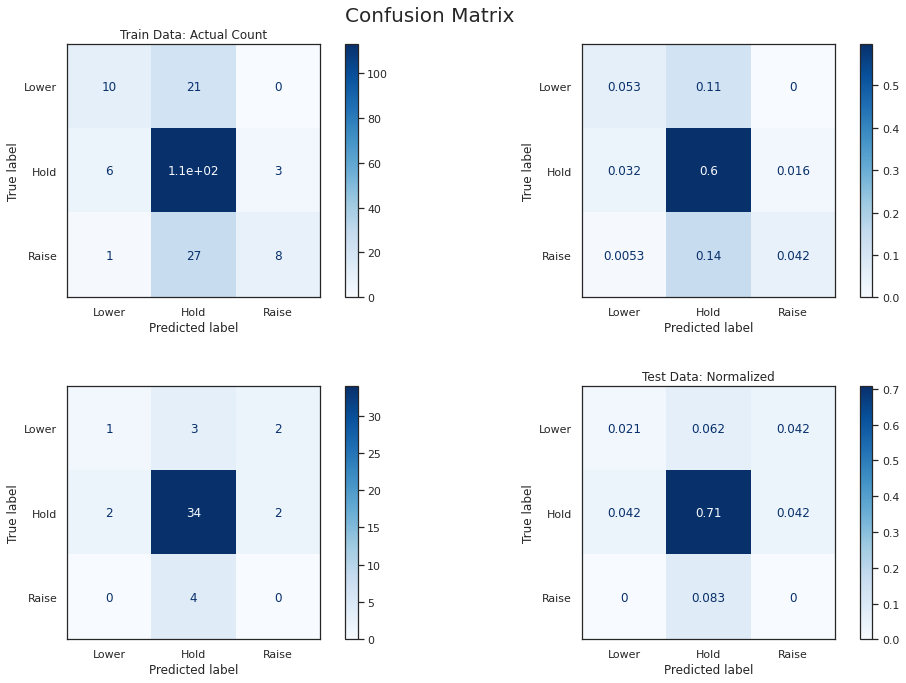

<Figure size 432x288 with 0 Axes>

In [ ]:
clf = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(analyzer='word', vocabulary=vocabulary))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', transfomer_numeric)
            ])),
             ('text_features', Pipeline([
                ('selector', transformer_text),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

# Perform Grid Search
param_grid = {'clf__n_estimators': np.linspace(1, 60, 10, dtype=int),
              'clf__min_samples_split': [3, 10],
              'clf__min_samples_leaf': [3],
              'clf__max_features': [7],
              'clf__max_depth': [None],
              'clf__criterion': ['gini'],
              'clf__bootstrap': [False]}

rf_model = train_grid_search(pipeline, param_grid, scoring, refit, cv=kfold, verbose=1, plot=True)
rf_best = rf_model.best_estimator_


### III. LSTM (RNN)
*Instead of Tfidf, use LSTM. Concatenate the lstm output and the meta data at the end and dense layer to fully connect them:*

#### Input Data

In [ ]:
# # Split data into training and validation datasets. Use an appropriate split size.

# split_frac = 0.8

# split_idx = int(len(token_ids)*split_frac)

# train_features = token_ids[:split_idx]
# valid_features = token_ids[split_idx:]
# train_labels = Y_data[:split_idx]
# valid_labels = Y_data[split_idx:]

# print("len(token_ids): ", len(token_ids))
# print("len(train_features): ", len(train_features))
# print("len(valid_features): ", len(valid_features))
# print("len(train_labels): ", len(train_labels))
# print("len(valid_labels): ", len(valid_labels))

# X and Y data used
y_data = train_df['target']
X_data = train_df[nontext_columns + ['tone', 'token_ids']]

# Train test split (Shuffle=False will make the test data for the most recent ones)
X_train, X_valid, y_train, y_valid = \
model_selection.train_test_split(X_data.values, y_data.values, test_size=0.2, shuffle=True)

X_train_meta = get_numeric_data(X_train)
X_train_text = get_text_data(X_train)
X_valid_meta = get_numeric_data(X_valid)
X_valid_text = get_text_data(X_valid)

print('Shape of train meta', len(X_train_meta))
print('Shape of train text', len(X_train_text))
print("Shape of valid meta ", len(X_valid_meta))
print("Shape of valid text ", len(X_valid_text))

meta_size = len(X_train_meta[0])
print("Meta data size: ", meta_size)


Shape of train meta 189
Shape of train text 189
Shape of valid meta  48
Shape of valid text  48
Meta data size:  9


#### Model
*Embed -> RNN -> Dense -> Softmax*

In [ ]:
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, lstm_size, dense_size, meta_size, output_size, lstm_layers=1, dropout=0.1):
        """
        Initialize the model
        """
        super().__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.lstm_size = lstm_size
        self.output_size = output_size
        self.lstm_layers = lstm_layers
        self.dropout = dropout

        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, lstm_size, lstm_layers, dropout=dropout, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(lstm_size, dense_size)
        self.fc2 = nn.Linear(dense_size + meta_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def init_hidden(self, batch_size):
        """
        Initialize the hidden state
        """

        weight = next(self.parameters()).data
        # print('initial weight size: ', weight.shape)
        # print('initial weight: ', weight)
        # print('initial weight new: ', weight.new(self.lstm_layers, batch_size, self.lstm_size))

        hidden = (weight.new(self.lstm_layers, batch_size, self.lstm_size).zero_(),
                  weight.new(self.lstm_layers, batch_size, self.lstm_size).zero_())
        
        return hidden

    def forward(self, nn_input_text, nn_input_meta, hidden_state):
        """
        Perform a forward pass of the model on nn_input
        """
        batch_size = nn_input_text.size(0)
        nn_input_text = nn_input_text.long()
        embeds = self.embedding(nn_input_text)
        lstm_out, hidden_state = self.lstm(embeds, hidden_state)
        # Stack up LSTM outputs, apply dropout
        lstm_out = lstm_out[-1,:,:]
        lstm_out = self.dropout(lstm_out)
        # Dense layer
        dense_out = self.fc1(lstm_out)
        # Concatinate the dense output and meta inputs
        concat_layer = torch.cat((dense_out, nn_input_meta.float()), 1)
        out = self.fc2(concat_layer)
        logps = self.softmax(out)

        return logps, hidden_state


#### DataLoaders and Batching
*Could use keras functions. This is built from scratch:*

In [ ]:
 #from keras.preprocessing.text import Tokenizer
 #from keras.preprocessing.sequence import pad_sequences
 #MAX_LEN = 100
 #tokenizer_obj = Tokenizer()
 #tokenizer_obj.fit_on_texts(balanced['texts'])
 #sequences = tokenizer_obj.texts_to_sequences(balanced['texts'])
 #text_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')
 #text_pad

In [ ]:
def dataloader(messages, meta, labels, sequence_length=200, batch_size=16, shuffle=False):
    """ 
    Build a dataloader.
    """
    if shuffle:
        indices = list(range(len(messages)))
        random.shuffle(indices)
        messages = [messages[idx] for idx in indices]
        meta = [meta[idx] for idx in indices]
        labels = [labels[idx] for idx in indices]

    total_sequences = len(messages)

    for ii in range(0, total_sequences, batch_size):
        batch_messages = messages[ii: ii+batch_size]
        
        # First initialize a tensor of all zeros
        batch = torch.zeros((sequence_length, len(batch_messages)), dtype=torch.int64)
        for batch_num, tokens in enumerate(batch_messages):
            token_tensor = torch.tensor(tokens)
            # print(len(tokens))
            # print(len(tokens[0]))
            # print(token_tensor.shape)
            # Left pad!
            start_idx = max(sequence_length - len(token_tensor), 0)
            # print(token_tensor[:sequence_length].shape)
            # print(start_idx, batch_num)
            batch[start_idx:, batch_num] = token_tensor[:sequence_length]
        label_tensor = torch.tensor(labels[ii: ii+len(batch_messages)])
        meta_tensor = torch.tensor(meta[ii: ii+len(batch_messages)])
        
        yield batch, meta_tensor, label_tensor

In [ ]:
# Test
text_batch, meta_batch, labels = next(iter(dataloader(X_train_text, X_train_meta, y_train)))
model = TextClassifier(len(vocab), 512, 128, 8, meta_size, 3)
hidden = model.init_hidden(16)
logps, hidden = model.forward(text_batch, meta_batch, hidden)
print(logps)

tensor([[-2.5526e+01, -3.1298e+01,  0.0000e+00],
        [-1.5616e-05, -2.3710e+01, -1.1069e+01],
        [-1.1590e+01, -2.3517e+01, -9.2983e-06],
        [-4.9131e+01, -4.5162e+01,  0.0000e+00],
        [-4.9298e+01, -4.4733e+01,  0.0000e+00],
        [ 0.0000e+00, -3.5084e+01, -3.5863e+01],
        [-2.5399e+01, -3.1202e+01,  0.0000e+00],
        [ 0.0000e+00, -2.5850e+01, -2.2903e+01],
        [ 0.0000e+00, -2.6333e+01, -2.4720e+01],
        [ 0.0000e+00, -3.0131e+01, -2.5198e+01],
        [-2.2539e-03, -2.0351e+01, -6.0963e+00],
        [-1.5892e+01, -2.8374e+01, -1.1921e-07],
        [ 0.0000e+00, -3.1515e+01, -2.7112e+01],
        [-3.8288e+01, -3.8450e+01,  0.0000e+00],
        [-5.6442e+01, -4.5757e+01,  0.0000e+00],
        [-3.2831e+01, -3.5207e+01,  0.0000e+00]], grad_fn=<LogSoftmaxBackward>)


#### Configure Model

In [ ]:
# Set model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TextClassifier(len(vocab)+1, 512, 128, 8, meta_size, 3, lstm_layers=2, dropout=0.2)
model.embedding.weight.data.uniform_(-1, 1)
model.to(device)

TextClassifier(
  (embedding): Embedding(26921, 512)
  (lstm): LSTM(512, 128, num_layers=2, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=8, bias=True)
  (fc2): Linear(in_features=17, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)

#### Train Model

In [ ]:
def train_model(model, epochs=3, batch_size=8, learning_rate=1e-4, sequence_length=200, clip=5, print_every=10):
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    model.train()

    for epoch in range(epochs):
        print('Starting epoch {}'.format(epoch + 1))
        hidden = model.init_hidden(batch_size)
        steps = 0
        y_valid_epoch = []
        predicted_valid_epoch = []

        for text_batch, meta_batch, labels in dataloader(
                X_train_text, X_train_meta, y_train, batch_size=batch_size, sequence_length=sequence_length, shuffle=False):
            steps += 1
            # Skip the last batch of which size is not equal to batch_size
            if text_batch.size(1) != batch_size:
                break

            # Creating new variables for the hidden state to avoid backprop entire training history
            hidden = tuple([each.data for each in hidden])
        
            # Set Device
            text_batch, meta_batch, labels = text_batch.to(device), meta_batch.to(device), labels.to(device)
            for each in hidden:
                each.to(device)
        
            # optimizer.zero_grad()
            model.zero_grad()
        
            # Get output and hidden state from the model
            output, hidden = model(text_batch, meta_batch, hidden)

            # Calculate the loss and perform backprop
            loss = criterion(output, labels)
            loss.backward()

            # Clip the gradient to prevent the exploading gradient problem in RNN/LSTM
            nn.utils.clip_grad_norm_(model.parameters(), clip)

            # Optimize
            optimizer.step()

            if steps % print_every == 0:
                model.eval()

                valid_losses = []
                accuracy = []
                predicted_valid = []
                y_valid_batch = []
                valid_hidden = model.init_hidden(batch_size)

                for text_batch, meta_batch, labels in dataloader(
                        X_valid_text, X_valid_meta, y_valid, batch_size=batch_size, sequence_length=sequence_length, shuffle=False):

                    # Skip the last batch of which size is not equal to batch_size
                    if text_batch.size(1) != batch_size:
                        break

                    # Initialize within the loop to use label shape because batch_size did not work
                    # valid_hidden = model.init_hidden(labels.shape[0])

                    # Creating new variables for the hidden state
                    valid_hidden = tuple([each.data for each in valid_hidden])

                    # Set Device
                    text_batch, meta_batch, labels = text_batch.to(device), meta_batch.to(device), labels.to(device)
                    for each in valid_hidden:
                        each.to(device)

                    # Get output and hidden state from the model
                    valid_output, valid_hidden = model(text_batch, meta_batch, valid_hidden)

                    # Calculate the loss     
                    valid_loss = criterion(valid_output.squeeze(), labels)
                    valid_losses.append(valid_loss.item())

                    # Accuracy
                    ps = torch.exp(valid_output)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy.append(torch.mean(equals.type(torch.FloatTensor)).item())

                    predicted_valid.extend(top_class.squeeze().cpu().numpy())
                    y_valid_batch.extend(labels.view(*top_class.shape).squeeze().cpu().numpy())

                model.train()
                acc, f1 = metric(y_valid_batch, predicted_valid)
                predicted_valid_epoch.extend(predicted_valid)
                y_valid_epoch.extend(y_valid_batch)

                print("Epoch: {}/{}...".format(epoch+1, epochs),
                      "Step: {}...".format(steps),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(valid_losses)),
                      "Accuracy: {:.6f}".format(acc),
                      "F1 Score: {:.6f}".format(f1))
        print("{} steps in epoch {}".format(steps, epoch+1))
        class_names = ['Lower', 'Hold', 'Raise']
        y_valid_class = [class_names[int(idx)] for idx in y_valid_batch]
        predicted_valid_class = [class_names[int(idx)] for idx in predicted_valid]
        titles_options = [("Confusion matrix, without normalization", None), ("Confusion matrix, with normalization", 'true')]
        for title, normalize in titles_options:
            disp = skplt.metrics.plot_confusion_matrix(y_valid_class, predicted_valid_class, normalize=normalize, title=title)
        acc, f1 = metric(y_valid_class, predicted_valid_class)
        print("\nEpoch: %d, Average Accuracy: %.8f, Average f1: %.8f\n" % (epoch+1, acc, f1))
        plt.show()
        plt.savefig(graph_dir + 'conf_mats_full_training.png')#bbox_inches='tight')

### IV. Glove Word Embed. + LSTM
*Use GloVe word embedding instead of Tfidf:*

#### Input Data

In [ ]:
# Use 6B 300d
glove_file = 'glove.6B.300d.pickle'
glove_path = glove_dir + glove_file

# Download Glove file if not exist
if not os.path.exists(glove_dir):
    if not os.path.exists(glove_dir):
        os.mkdir(glove_dir)
    !wget -o ${glove_path} http://nlp.stanford.edu/data/glove.6B.zip
    !unzip ${glove_path}glove*.zip

    embedding_dict = {}

    with open(glove_dir + "glove.6B.300d.txt", 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vectors = np.asarray(values[1:], 'float32')
            embedding_dict[word] = vectors
    f.close()

    pickle.dump(embedding_dict, open(glove_path, 'wb'))

In [ ]:
glove_dict = pickle.load(open(glove_path, 'rb'))
print(len(glove_dict))
glove_dict['the']


400000


array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
        2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
       -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
        2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
       -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
       -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
        9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
       -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
        1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
        2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
        1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
        2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
       -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
       -4.4640e-01,  1.7197e-01,  4.6246e-02,  5.8639e-02,  4.14

In [ ]:
weight_matrix = np.zeros((len(vocab), 300))
words_found = 0

for i, word in enumerate(vocab):
    try:
        weight_matrix[i] = glove_dict[word]
        words_found += 1
    except KeyError:
        weight_matrix[i] = np.random.normal(scale=0.6, size=(300,))

print('{} words found out of {} words in vocab.'.format(words_found, len(vocab)))
print(weight_matrix.shape)


11766 words found out of 26920 words in vocab.
(26920, 300)


In [ ]:
type(weight_matrix)


numpy.ndarray

#### Model

In [ ]:
class GloveTextClassifier(nn.Module):
    def __init__(self, weight_matrix, lstm_size, dense_size, meta_size, output_size, lstm_layers=1, dropout=0.1):
        super().__init__()
        vocab_size, embed_size = weight_matrix.shape
        self.lstm_size = lstm_size
        self.output_size = output_size
        self.lstm_layers = lstm_layers
        self.dropout = dropout

        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.embedding.load_state_dict({'weight': torch.tensor(weight_matrix)})
        self.embedding.weight.requires_grad = False
        self.lstm = nn.LSTM(embed_size, lstm_size, lstm_layers, dropout=dropout, batch_first=False)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(lstm_size, dense_size)
        self.fc2 = nn.Linear(dense_size + meta_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.lstm_layers, batch_size, self.lstm_size).zero_(),
                  weight.new(self.lstm_layers, batch_size, self.lstm_size).zero_())
        
        return hidden

    def forward(self, nn_input_text, nn_input_meta, hidden_state):
        batch_size = nn_input_text.size(0)
        nn_input_text = nn_input_text.long()
        embeds = self.embedding(nn_input_text)
        lstm_out, hidden_state = self.lstm(embeds, hidden_state)
        # Stack up LSTM outputs, apply dropout
        lstm_out = lstm_out[-1,:,:]
        lstm_out = self.dropout(lstm_out)
        # Dense layer
        dense_out = self.fc1(lstm_out)
        # Concatinate the dense output and meta inputs
        concat_layer = torch.cat((dense_out, nn_input_meta.float()), 1)
        out = self.fc2(concat_layer)
        logps = self.softmax(out)

        return logps, hidden_state


#### Configure Model

In [ ]:
# Set model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GloveTextClassifier(weight_matrix, 128, 8, meta_size, 3, lstm_layers=2, dropout=0.2)
model.to(device)


GloveTextClassifier(
  (embedding): Embedding(26920, 300)
  (lstm): LSTM(300, 128, num_layers=2, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=8, bias=True)
  (fc2): Linear(in_features=17, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)

Starting epoch 1
Epoch: 1/3... Step: 10... Loss: 9.112595... Val Loss: 2.936284 Accuracy: 0.729167 F1 Score: 0.331117
Epoch: 1/3... Step: 20... Loss: 14.855077... Val Loss: 2.885410 Accuracy: 0.729167 F1 Score: 0.331117
24 steps in epoch 1

Epoch: 1, Average Accuracy: 0.72916667, Average f1: 0.33111744



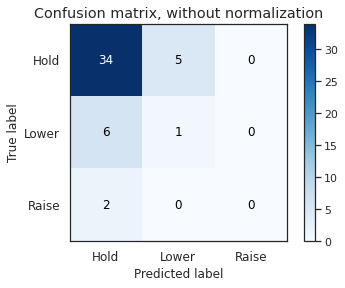

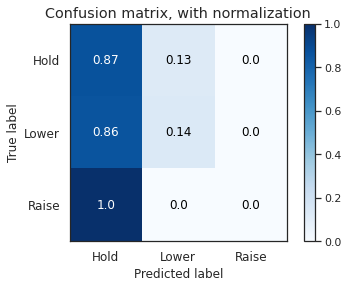

Starting epoch 2
Epoch: 2/3... Step: 10... Loss: 8.817862... Val Loss: 2.819411 Accuracy: 0.729167 F1 Score: 0.331117
Epoch: 2/3... Step: 20... Loss: 14.346961... Val Loss: 2.767932 Accuracy: 0.729167 F1 Score: 0.331117
24 steps in epoch 2

Epoch: 2, Average Accuracy: 0.72916667, Average f1: 0.33111744



<Figure size 432x288 with 0 Axes>

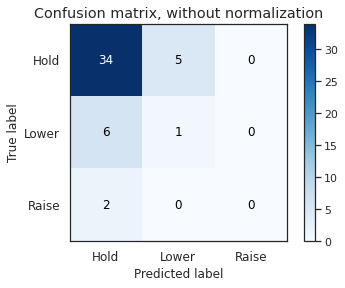

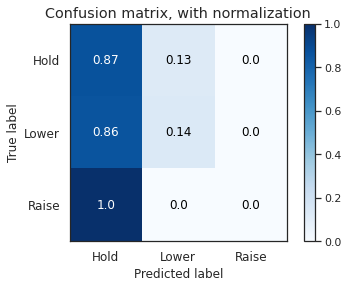

Starting epoch 3
Epoch: 3/3... Step: 10... Loss: 8.520513... Val Loss: 2.699476 Accuracy: 0.729167 F1 Score: 0.331117
Epoch: 3/3... Step: 20... Loss: 13.841166... Val Loss: 2.643033 Accuracy: 0.729167 F1 Score: 0.331117
24 steps in epoch 3

Epoch: 3, Average Accuracy: 0.72916667, Average f1: 0.33111744



<Figure size 432x288 with 0 Axes>

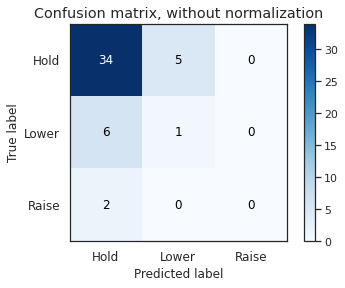

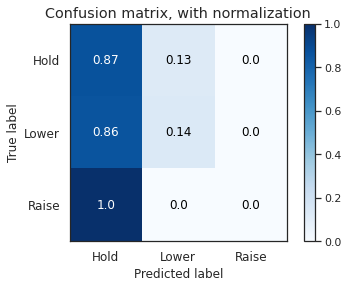

<Figure size 432x288 with 0 Axes>

In [ ]:
train_model(model)


The result does not look good. In fact, only the first hunderds of text can be used. Now, consider to split the text to the length of 200 with overlapping 50 words again.

In [ ]:
train_df.columns


Index(['target', 'prev_decision', 'GDP_diff_prev', 'PMI_value',
       'Employ_diff_prev', 'Rsales_diff_year', 'Unemp_diff_prev',
       'Inertia_diff', 'Hsales_diff_year', 'Balanced_diff', 'statement',
       'minutes', 'presconf_script', 'speech', 'testimony', 'text', 'tone',
       'tokenized', 'token_ids', 'tokenized_text', 'tfidf_Negative',
       'tfidf_Positive', 'tfidf_Uncertainty', 'tfidf_Litigious',
       'tfidf_StrongModal', 'tfidf_Constraining', 'cos_sim_Negative',
       'cos_sim_Positive', 'cos_sim_Uncertainty', 'cos_sim_Litigious',
       'cos_sim_StrongModal', 'cos_sim_Constraining'],
      dtype='object')

In [ ]:
split_train_df = train_df.drop(columns=['statement',
       'minutes', 'speech', 'testimony',
       'tokenized', 'token_ids', 'tokenized_text', 'tfidf_Negative',
       'tfidf_Positive', 'tfidf_Uncertainty', 'tfidf_Litigious',
       'tfidf_StrongModal', 'tfidf_Constraining', 'cos_sim_Negative',
       'cos_sim_Positive', 'cos_sim_Uncertainty', 'cos_sim_Litigious',
       'cos_sim_StrongModal', 'cos_sim_Constraining'])


In [ ]:
split_train_df.shape


(237, 13)

In [ ]:
# Split functions to process long text in machine learning based NLP

def get_split(text, split_len=200, overlap=50):
    '''
    Returns a list of split text of $split_len with overlapping of $overlap.
    Each item of the list will have around split_len length of text.
    '''
    l_total = []
    words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', text)
    
    if len(words) < split_len:
        n = 1
    else:
        n = (len(words) - overlap) // (split_len - overlap) + 1
        
    for i in range(n):
        l_parcial = words[(split_len - overlap) * i: (split_len - overlap) * i + split_len]
        l_total.append(" ".join(l_parcial))
    return l_total

def get_split_df(df, split_len=200, overlap=50):
    '''
    Returns a dataframe which is an extension of an input dataframe.
    Each row in the new dataframe has less than $split_len words in 'text'.
    '''
    split_data_list = []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):
        #print("Original Word Count: ", row['word_count'])
        text_list = get_split(row["text"], split_len, overlap)
        for text in text_list:
            row['text'] = text
            #print(len(re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', text)))
            #row['word_count'] = len(re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', text))
            split_data_list.append(list(row))
            
    split_df = pd.DataFrame(split_data_list, columns=df.columns)

    return split_df
    

In [ ]:
split_train_df = get_split_df(split_train_df)
split_train_df.shape


(19974, 13)

In [ ]:
tokenized = tokenize_df(split_train_df)
lemma_docs = [" ".join(words) for words in tokenized]
all_words = [word for text in tokenized for word in text]
counts = Counter(all_words)
bow = sorted(counts, key=counts.get, reverse=True)
vocab = {word: ii for ii, word in enumerate(counts, 1)}
id2vocab = {v: k for k, v in vocab.items()}
token_ids = [[vocab[word] for word in text_words] for text_words in tokenized]

# Add to the dataframe
split_train_df['token_ids'] = token_ids


In [ ]:
weight_matrix = np.zeros((len(vocab)+1, 300))
words_found = 0

for i, word in enumerate(vocab):
    try:
        weight_matrix[i] = glove_dict[word]
        words_found += 1
    except KeyError:
        weight_matrix[i] = np.random.normal(scale=0.6, size=(300,))


In [ ]:
split_train_df.head()


target  ...                                          token_ids
0       1  ...  [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 10, 11, 12, 13,...
1       1  ...  [55, 56, 11, 12, 57, 58, 55, 59, 60, 56, 11, 1...
2       1  ...  [56, 11, 12, 57, 103, 25, 77, 104, 105, 56, 11...
3       1  ...  [144, 142, 145, 146, 147, 148, 149, 118, 119, ...
4       1  ...  [175, 176, 177, 169, 178, 179, 180, 181, 182, ...

[5 rows x 14 columns]

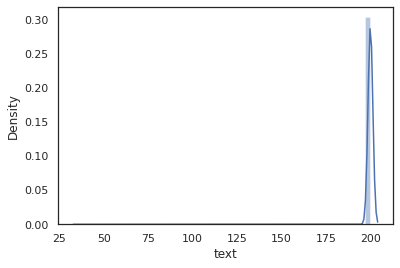

In [ ]:
sns.distplot(split_train_df['text'].apply(lambda x: len(x.split())))


In [ ]:
# X and Y data used
y_data = split_train_df['target']
X_data = split_train_df[nontext_columns + ['tone', 'token_ids']]

# Train test split (Shuffle=False will make the test data for the most recent ones)
X_train, X_valid, y_train, y_valid = \
model_selection.train_test_split(X_data.values, y_data.values, test_size=0.2, shuffle=True)

X_train_meta = get_numeric_data(X_train)
X_train_text = get_text_data(X_train)
X_valid_meta = get_numeric_data(X_valid)
X_valid_text = get_text_data(X_valid)

print('Shape of train meta', len(X_train_meta))
print('Shape of train text', len(X_train_text))
print("Shape of valid meta ", len(X_valid_meta))
print("Shape of valid text ", len(X_valid_text))

meta_size = len(X_train_meta[0])
print("Meta data size: ", meta_size)


Shape of train meta 15979
Shape of train text 15979
Shape of valid meta  3995
Shape of valid text  3995
Meta data size:  9


In [ ]:
len(weight_matrix)


27716

In [ ]:
# Set model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GloveTextClassifier(weight_matrix, 128, 8, meta_size, 3, lstm_layers=2, dropout=0.2)
model.to(device)


GloveTextClassifier(
  (embedding): Embedding(27716, 300)
  (lstm): LSTM(300, 128, num_layers=2, dropout=0.2)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=128, out_features=8, bias=True)
  (fc2): Linear(in_features=17, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)

#### Train Model

Starting epoch 1
Epoch: 1/3... Step: 10... Loss: 18.428333... Val Loss: 28.339404 Accuracy: 0.075301 F1 Score: 0.055640
Epoch: 1/3... Step: 20... Loss: 25.012129... Val Loss: 27.903581 Accuracy: 0.075301 F1 Score: 0.055640
Epoch: 1/3... Step: 30... Loss: 20.320839... Val Loss: 27.465781 Accuracy: 0.080572 F1 Score: 0.060863
Epoch: 1/3... Step: 40... Loss: 20.154690... Val Loss: 27.014359 Accuracy: 0.080572 F1 Score: 0.060863
Epoch: 1/3... Step: 50... Loss: 23.493519... Val Loss: 26.516652 Accuracy: 0.083082 F1 Score: 0.063785
Epoch: 1/3... Step: 60... Loss: 17.672779... Val Loss: 25.871492 Accuracy: 0.082078 F1 Score: 0.064063
Epoch: 1/3... Step: 70... Loss: 13.999308... Val Loss: 24.852895 Accuracy: 0.078815 F1 Score: 0.062116
Epoch: 1/3... Step: 80... Loss: 28.473644... Val Loss: 23.739015 Accuracy: 0.131024 F1 Score: 0.108177
Epoch: 1/3... Step: 90... Loss: 25.520273... Val Loss: 22.849410 Accuracy: 0.132279 F1 Score: 0.108783
Epoch: 1/3... Step: 100... Loss: 20.978685... Val Loss: 

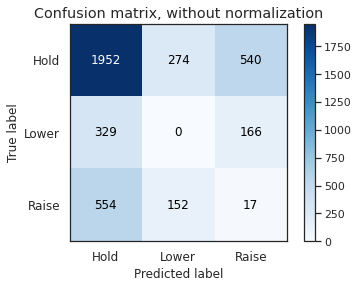

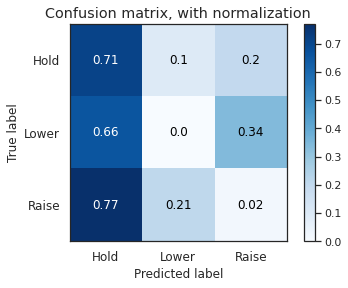

Starting epoch 2
Epoch: 2/3... Step: 10... Loss: 1.206359... Val Loss: 4.678074 Accuracy: 0.485944 F1 Score: 0.243745
Epoch: 2/3... Step: 20... Loss: 3.008859... Val Loss: 4.527054 Accuracy: 0.485944 F1 Score: 0.242956
Epoch: 2/3... Step: 30... Loss: 1.954596... Val Loss: 4.379509 Accuracy: 0.501757 F1 Score: 0.247202
Epoch: 2/3... Step: 40... Loss: 2.630062... Val Loss: 4.236898 Accuracy: 0.510291 F1 Score: 0.250742
Epoch: 2/3... Step: 50... Loss: 2.434989... Val Loss: 4.097671 Accuracy: 0.505271 F1 Score: 0.249025
Epoch: 2/3... Step: 60... Loss: 7.451366... Val Loss: 3.958860 Accuracy: 0.507530 F1 Score: 0.250626
Epoch: 2/3... Step: 70... Loss: 3.632784... Val Loss: 3.827883 Accuracy: 0.504769 F1 Score: 0.249904
Epoch: 2/3... Step: 80... Loss: 2.657770... Val Loss: 3.710281 Accuracy: 0.507028 F1 Score: 0.250681
Epoch: 2/3... Step: 90... Loss: 2.244355... Val Loss: 3.596107 Accuracy: 0.497741 F1 Score: 0.246954
Epoch: 2/3... Step: 100... Loss: 1.155500... Val Loss: 3.482940 Accuracy: 

<Figure size 432x288 with 0 Axes>

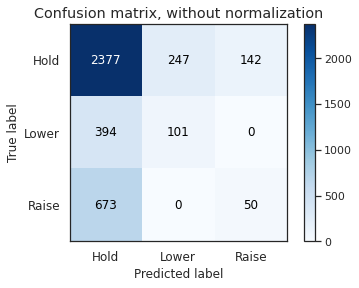

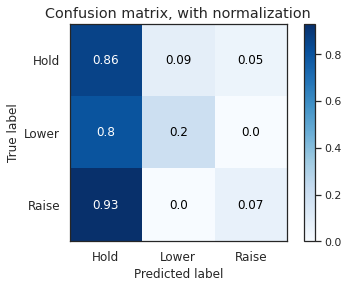

Starting epoch 3
Epoch: 3/3... Step: 10... Loss: 0.353822... Val Loss: 0.875092 Accuracy: 0.625502 F1 Score: 0.367705
Epoch: 3/3... Step: 20... Loss: 0.611452... Val Loss: 0.875377 Accuracy: 0.638303 F1 Score: 0.340754
Epoch: 3/3... Step: 30... Loss: 0.949969... Val Loss: 0.875212 Accuracy: 0.640813 F1 Score: 0.341821
Epoch: 3/3... Step: 40... Loss: 1.387490... Val Loss: 0.874059 Accuracy: 0.651857 F1 Score: 0.359800
Epoch: 3/3... Step: 50... Loss: 0.717128... Val Loss: 0.873170 Accuracy: 0.651857 F1 Score: 0.359800
Epoch: 3/3... Step: 60... Loss: 1.767632... Val Loss: 0.863905 Accuracy: 0.642570 F1 Score: 0.343910
Epoch: 3/3... Step: 70... Loss: 1.201651... Val Loss: 0.863213 Accuracy: 0.601908 F1 Score: 0.338165
Epoch: 3/3... Step: 80... Loss: 1.062871... Val Loss: 0.858582 Accuracy: 0.631526 F1 Score: 0.337975
Epoch: 3/3... Step: 90... Loss: 0.480357... Val Loss: 0.857031 Accuracy: 0.647590 F1 Score: 0.358033
Epoch: 3/3... Step: 100... Loss: 0.565096... Val Loss: 0.854754 Accuracy: 

<Figure size 432x288 with 0 Axes>

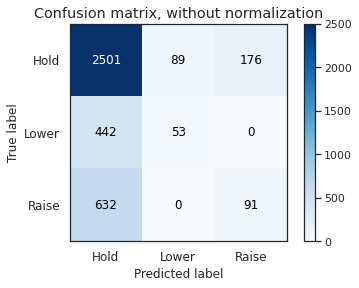

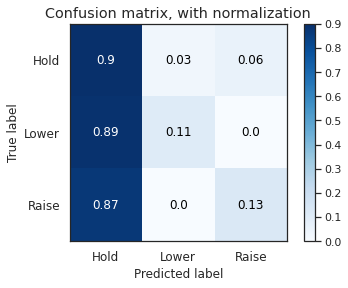

<Figure size 432x288 with 0 Axes>

In [ ]:
# Train the model (TODO long waiting times; gpu mounting issues, assign processes to gpu threads?):
train_model(model, epochs=3, batch_size=16, learning_rate=1e-4, sequence_length=200, clip=5, print_every=10)


### V. BERT Model

#### Configure Model

In [ ]:
#from transformers import *
from transformers import BertTokenizer, BertForSequenceClassification, BertModel


In [ ]:
class InputFeature(object):
    def __init__(self, id, input_ids, masks, segments, meta, label=None):
        self.id = id
        self.features = {
            'input_ids': input_ids,
            'input_mask': masks,
            'segment_ids': segments,
            'meta': meta
        }
        self.label = label


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def bert_encoder(text, max_len=200):
    text_token = tokenizer.tokenize(text)
    text_token = text_token[:max_len-2]
    text_token = ["[CLS]"] + text_token + ["[SEP]"]
    text_ids = tokenizer.convert_tokens_to_ids(text_token)
    text_ids += [0] * (max_len - len(text_token))
    pad_masks = [1] * len(text_token) + [0] * (max_len - len(text_token))
    segment_ids = [0] * len(text_token) + [0] * (max_len - len(text_token))
    
    return text_ids, pad_masks, segment_ids


In [ ]:
train_set = []
max_seq_length = 200
meta_size = 10

for index, row in tqdm(split_train_df.iterrows(), total=split_train_df.shape[0]):
    input_ids, masks, segments = bert_encoder(row['text'], max_seq_length)
    train_set.append(InputFeature(row.index, input_ids, masks, segments, row[nontext_columns + ['tone']], int(row['target'])))    

train_labels = split_train_df['target'].astype(int).values
train_valid_input_ids = np.array([data.features['input_ids'] for data in train_set])
train_valid_input_masks = np.array([data.features['input_mask'] for data in train_set])
train_valid_segment_ids =np.array([data.features['segment_ids'] for data in train_set])
train_valid_meta =np.array([data.features['meta'] for data in train_set], dtype=np.float64)
train_valid_labels = np.array([data.label for data in train_set])

oof_train = np.zeros((len(split_train_df), 3), dtype=np.float32)


In [ ]:
print(train_valid_meta[0])
print(train_valid_meta[1])


[ 1.00000000e+00  1.04316469e+00  5.58000000e+01  2.61000000e+02
  1.80763085e+00  0.00000000e+00 -1.59017884e-02  1.49014176e+01
  3.58787053e-02 -1.46710838e-01]
[ 1.00000000e+00  1.04316469e+00  5.58000000e+01  2.61000000e+02
  1.80763085e+00  0.00000000e+00 -1.59017884e-02  1.49014176e+01
  3.58787053e-02 -1.46710838e-01]


#### Model

In [ ]:
class BertTextClassifier(nn.Module):
    def __init__(self, hidden_size, dense_size, meta_size, output_size, dropout=0.1):
        super().__init__()
        self.output_size = output_size
        self.dropout = dropout
        
        self.bert = BertModel.from_pretrained('bert-base-uncased',  
                                        output_hidden_states=True,
                                        output_attentions=True)
        for param in self.bert.parameters():
            param.requires_grad = True
        self.weights = nn.Parameter(torch.rand(13, 1))
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(hidden_size, dense_size)
        self.fc2 = nn.Linear(dense_size + meta_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_ids, nn_input_meta):
        all_hidden_states, all_attentions = self.bert(input_ids)[-2:]
        batch_size = input_ids.shape[0]
        ht_cls = torch.cat(all_hidden_states)[:, :1, :].view(13, batch_size, 1, 768)
        atten = torch.sum(ht_cls * self.weights.view(13, 1, 1, 1), dim=[1, 3])
        atten = F.softmax(atten.view(-1), dim=0)
        feature = torch.sum(ht_cls * atten.view(13, 1, 1, 1), dim=[0, 2])        
        # Dense layer
        dense_out = self.fc1(self.dropout(feature))
        concat_layer = torch.cat((dense_out, nn_input_meta.float()), 1)
        # print(len(dense_out[0]))
        # print(len(nn_input_meta[0]))
        # print(len(concat_layer[0]))
        # print("dense_out: \n", dense_out)
        # print("nn_input_meta: \n", nn_input_meta)
        # print("concat_layer: \n", concat_layer)
        out = self.fc2(concat_layer)
        #logps = self.softmax(out)

        return out


In [ ]:
# Check how BertTokenizer works
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
torch.save(model.state_dict(), model_dir + 'bert_case_unbased')

input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
outputs = model(input_ids)

print(input_ids)
print(outputs) # The last hidden-state is the first element of the output tuple



tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]])
(tensor([[[-0.1144,  0.1937,  0.1250,  ..., -0.3827,  0.2107,  0.5407],
         [ 0.5308,  0.3207,  0.3665,  ..., -0.0036,  0.7579,  0.0388],
         [-0.4877,  0.8849,  0.4256,  ..., -0.6976,  0.4458,  0.1231],
         ...,
         [-0.7003, -0.1815,  0.3297,  ..., -0.4838,  0.0680,  0.8901],
         [-1.0355, -0.2567, -0.0317,  ...,  0.3197,  0.3999,  0.1795],
         [ 0.6080,  0.2610, -0.3131,  ...,  0.0311, -0.6283, -0.1994]]],
       grad_fn=<NativeLayerNormBackward>), tensor([[-7.1946e-01, -2.1445e-01, -2.9576e-01,  3.6603e-01,  2.7968e-01,
          2.2184e-02,  5.7299e-01,  6.2331e-02,  5.9586e-02, -9.9965e-01,
          5.0146e-02,  4.4756e-01,  9.7612e-01,  3.3988e-02,  8.4494e-01,
         -3.6905e-01,  9.8649e-02, -3.7169e-01,  1.7371e-01,  1.1515e-01,
          4.4133e-01,  9.9525e-01,  3.7221e-01,  8.2881e-02,  2.1402e-01,
          6.8965e-01, -6.1042e-01,  8.7136e-01,  9.4158e-01,  5.7372e-01,
  

#### Configure Model

In [ ]:
# Test Tokenizer - Own Implementation
bert_model = BertTextClassifier(768, 128, meta_size, 3, dropout=0.1)

text_ids, pad_masks, segment_ids = bert_encoder("Hello, my dog is cute")
print('text_ids: \n', text_ids)
print('text_ids (torch.tensor): \n', torch.tensor(text_ids))
text_ids = torch.tensor(text_ids).unsqueeze(0)
print('text_ids (unsqueezed): \n', text_ids)
#print('pad_masks: ',pad_masks)
#print('segment_ids: ',segment_ids)
x_meta = torch.tensor([1,2,3,4,5,6,7,8,9,10]).unsqueeze(0)
outputs = bert_model(text_ids, x_meta)
print(len(outputs))
print('outputs: \n',outputs)
print('outputs(detached): \n', outputs.detach())


text_ids: 
 [101, 7592, 1010, 2026, 3899, 2003, 10140, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
text_ids (torch.tensor): 
 tensor([  101,  7592,  1010,  2026,  3899,  2003, 10140,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,    

In [ ]:
# Hyperparameters
learning_rate = 1e-5
num_epochs = 3
batch_size = 32
patience =2
file_name = 'model'
use_skf = True
bert_hidden_size = 768
bert_dense_size =128


#### Custom Training Model Definition

In [ ]:
def train_bert(fold, train_indices, valid_indices):
    
    # Number of folds to iterrate
    # if fold == 3:
    #     break

    logger.info('================     fold {}        ==============='.format(fold))
    
    # Train Data in Tensor
    train_input_ids = torch.tensor(train_valid_input_ids[train_indices], dtype=torch.long)
    train_input_mask = torch.tensor(train_valid_input_masks[train_indices], dtype=torch.long)
    train_segment_ids = torch.tensor(train_valid_segment_ids[train_indices], dtype=torch.long)
    train_label = torch.tensor(train_valid_labels[train_indices], dtype=torch.long)
    train_meta = torch.tensor(train_valid_meta[train_indices], dtype=torch.long)
    
    # Validation Data in Tensor
    valid_input_ids = torch.tensor(train_valid_input_ids[valid_indices], dtype=torch.long)
    valid_input_mask = torch.tensor(train_valid_input_masks[valid_indices], dtype=torch.long)
    valid_segment_ids = torch.tensor(train_valid_segment_ids[valid_indices], dtype=torch.long)
    valid_label = torch.tensor(train_valid_labels[valid_indices], dtype=torch.long)
    valid_meta = torch.tensor(train_valid_meta[valid_indices], dtype=torch.long)

    # Load data into TensorDataset
    train = torch.utils.data.TensorDataset(train_input_ids, train_input_mask, train_segment_ids, train_meta, train_label)
    valid = torch.utils.data.TensorDataset(valid_input_ids, valid_input_mask, valid_segment_ids, valid_meta, valid_label)
    
    # Use DataLoader to load data from Dataset in batches
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

    bert_model = BertTextClassifier(bert_hidden_size, bert_dense_size, meta_size, 3, dropout=0.1)
    
    # Move model to GPU/CPU device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    bert_model = bert_model.to(device)
    
    # Loss Function - use Cross Entropy as binary classification
    loss_fn = torch.nn.CrossEntropyLoss()

    # Optimizer - Adam with parameter groups
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}]

    optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=1e-6)
    
    # Set Train Mode
    bert_model.train()

    # Initialize
    best_f1 = 0.
    valid_best = np.zeros((valid_label.size(0), 2))
    early_stop = 0
    train_losses = []
    valid_losses = []
    
    for epoch in range(num_epochs):
        logger.info('================     epoch {}        ==============='.format(epoch+1))
        train_loss = 0.
        for i, batch in tqdm(enumerate(train_loader), total=len(train_loader), desc='Training'):
            # Move batch data to device
            batch = tuple(t.to(device) for t in batch)
            # Bert input features and labels from batch
            x_ids, x_mask, x_sids, x_meta, y_truth = batch
            
            # Feedforward prediction
            y_pred = bert_model(x_ids, x_meta)

            # Calculate Loss
            loss = loss_fn(y_pred, y_truth)
                        
            # Reset gradient
            optimizer.zero_grad()
            # Backward Propagation
            loss.backward()
            # Update Weights
            optimizer.step()
            # Training Loss
            train_loss += loss.item() / len(train_loader)
            
            logger.debug('train batch: %d, train_loss: %8f\n' % (i, train_loss))

        train_losses.append(train_loss)
        # Move to Evaluation Mode
        model.eval()
        
        # Initialize
        val_loss = 0.
        valid_preds_fold = np.zeros((valid_label.size(0), 3))
        
        with torch.no_grad():
            for i, batch in tqdm(enumerate(valid_loader), total=len(valid_loader), desc='Validation'):
                batch = tuple(t.to(device) for t in batch)
                x_ids, x_mask, x_sids, x_meta, y_truth = batch
                y_pred = bert_model(x_ids, x_meta).detach()
                loss = loss_fn(y_pred, y_truth)
                val_loss += loss.item() / len(valid_loader)
                valid_preds_fold[i * batch_size:(i + 1) * batch_size] = F.softmax(y_pred, dim=1).cpu().numpy()
                
                logger.debug('validation batch: {}, val_loss: {}, valid_preds_fold: {}'.format(i, val_loss, valid_preds_fold[i * batch_size:(i + 1) * batch_size]))
            valid_losses.append(val_loss)

        # Calculate metrics
        acc, f1 = metric(train_valid_labels[valid_indices], np.argmax(valid_preds_fold, axis=1))
        
        # If improving, save the model. If not, count up for early stopping
        if best_f1 < f1:
            early_stop = 0
            best_f1 = f1
            valid_best = valid_preds_fold
            torch.save(bert_model.state_dict(), output_dir + 'model_fold_{}.dict'.format(fold))
        else:
            early_stop += 1
            
        logger.info(
            'epoch: %d, train loss: %.8f, valid loss: %.8f, acc: %.8f, f1: %.8f, best_f1: %.8f\n' %
            (epoch, train_loss, val_loss, acc, f1, best_f1))
        
        if device == 'cuda:0':
            torch.cuda.empty_cache()  

        # Early stop if it reaches patience number
        if early_stop >= patience:
            break
            
        model.train()

    # Once all epochs are done, take the best model of the fold
    valid_preds_fold = np.zeros((valid_label.size(0), 3))
    
    # Draw training/validation losses
    sns.set(font_scale=1.5)
    plt.rcParams["figure.figsize"] = (15,6)
    plt.plot(train_losses, 'b-o')
    plt.plot(valid_losses, 'b-o')
    plt.title("Training/Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
    plt.savefig(graph_dir + 'training_validation_loss_bert_epoch_{}_fold_{}'.format(epoch,fold) + '.png', )#bbox_inches='tight')

    # Load the best model
    bert_model.load_state_dict(torch.load(output_dir + 'model_fold_{}.dict'.format(fold)))
    # Set Evaluation Mode
    bert_model.eval()

    # Prediction on the validation set
    with torch.no_grad():
        for i, batch in tqdm(enumerate(valid_loader), total=len(valid_loader)):
            batch = tuple(t.to(device) for t in batch)
            x_ids, x_mask, x_sids, x_meta, y_truth = batch
            y_pred = bert_model(x_ids, x_meta).detach()
            valid_preds_fold[i * batch_size:(i + 1) * batch_size] = F.softmax(y_pred, dim=1).cpu().numpy()

    # Check the metrics for the validation set
    valid_best = valid_preds_fold
    oof_train[valid_indices] = valid_best
    acc, f1 = metric(train_valid_labels[valid_indices], np.argmax(valid_best, axis=1))
    logger.info('epoch: best, acc: %.8f, f1: %.8f, best_f1: %.8f\n' % (acc, f1, best_f1))

    class_names = ['Lower', 'Hold', 'Raise']
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = skplt.metrics.plot_confusion_matrix(train_valid_labels[valid_indices], np.argmax(valid_best, axis=1), normalize=normalize, title=title)
    plt.show()
    plt.savefig(graph_dir + 'conf_mats_bert_final.png')#bbox_inches='tight')


#### Train Model

[2021-01-25 14:04:00,210][INFO] ## ================     fold 0        ===============
[2021-01-25 14:04:04,397][INFO] ## ================     epoch 1        ===============


[2021-01-25 14:04:04,761][DEBUG] ## train batch: 0, train_loss: 0.008635

[2021-01-25 14:04:05,088][DEBUG] ## train batch: 1, train_loss: 0.019707

[2021-01-25 14:04:05,418][DEBUG] ## train batch: 2, train_loss: 0.031436

[2021-01-25 14:04:05,748][DEBUG] ## train batch: 3, train_loss: 0.041147

[2021-01-25 14:04:06,076][DEBUG] ## train batch: 4, train_loss: 0.051830

[2021-01-25 14:04:06,406][DEBUG] ## train batch: 5, train_loss: 0.059702

[2021-01-25 14:04:06,735][DEBUG] ## train batch: 6, train_loss: 0.066347

[2021-01-25 14:04:07,065][DEBUG] ## train batch: 7, train_loss: 0.072274

[2021-01-25 14:04:07,399][DEBUG] ## train batch: 8, train_loss: 0.078164

[2021-01-25 14:04:07,728][DEBUG] ## train batch: 9, train_loss: 0.087356

[2021-01-25 14:04:08,057][DEBUG] ## train batch: 10, train_loss: 0.094832

[2021-01-25 14:04:08,386][DEBUG] ## train batch: 11, train_loss: 0.106799

[2021-01-25 14:04:08,716][DEBUG] ## train batch: 12, train_loss: 0.113032

[2021-01-25 14:04:09,046][DEBUG] ##

[2021-01-25 14:06:50,381][DEBUG] ## validation batch: 0, val_loss: 0.0014347100257873534, valid_preds_fold: [[0.01123532 0.97934294 0.00942169]
 [0.0102905  0.98248863 0.00722088]
 [0.01053219 0.98239625 0.00707159]
 [0.01116076 0.98043972 0.0083995 ]
 [0.0102666  0.9831214  0.006612  ]
 [0.01108786 0.98163384 0.00727834]
 [0.01064613 0.98010892 0.00924496]
 [0.01111761 0.98104399 0.00783837]
 [0.01037025 0.98338807 0.00624167]
 [0.02704981 0.59954208 0.37340814]
 [0.02477569 0.56620073 0.40902358]
 [0.02625682 0.61929309 0.35445011]
 [0.02725863 0.60963786 0.36310354]
 [0.0290665  0.60645849 0.36447504]
 [0.0254952  0.61093128 0.36357352]
 [0.02846764 0.60751551 0.36401689]
 [0.02643936 0.53987968 0.43368095]
 [0.02738515 0.59808362 0.37453127]
 [0.02645911 0.59342885 0.38011205]
 [0.0196047  0.96745801 0.01293728]
 [0.02203833 0.96168512 0.0162766 ]
 [0.0191979  0.96845239 0.0123497 ]
 [0.01906286 0.96907246 0.01186471]
 [0.02286918 0.96154499 0.01558579]
 [0.01885418 0.96973801 0.01

[2021-01-25 14:07:08,949][INFO] ## epoch: 0, train loss: 4.06747181, valid loss: 3.98940323, acc: 0.45031289, f1: 0.24391190, best_f1: 0.24391190

[2021-01-25 14:07:08,952][INFO] ## ================     epoch 2        ===============


[2021-01-25 14:07:09,341][DEBUG] ## train batch: 0, train_loss: 0.012583

[2021-01-25 14:07:09,673][DEBUG] ## train batch: 1, train_loss: 0.017776

[2021-01-25 14:07:10,005][DEBUG] ## train batch: 2, train_loss: 0.027336

[2021-01-25 14:07:10,335][DEBUG] ## train batch: 3, train_loss: 0.037031

[2021-01-25 14:07:10,665][DEBUG] ## train batch: 4, train_loss: 0.046177

[2021-01-25 14:07:10,998][DEBUG] ## train batch: 5, train_loss: 0.055556

[2021-01-25 14:07:11,331][DEBUG] ## train batch: 6, train_loss: 0.065718

[2021-01-25 14:07:11,663][DEBUG] ## train batch: 7, train_loss: 0.074666

[2021-01-25 14:07:11,994][DEBUG] ## train batch: 8, train_loss: 0.085728

[2021-01-25 14:07:12,327][DEBUG] ## train batch: 9, train_loss: 0.095560

[2021-01-25 14:07:12,658][DEBUG] ## train batch: 10, train_loss: 0.104136

[2021-01-25 14:07:12,989][DEBUG] ## train batch: 11, train_loss: 0.109494

[2021-01-25 14:07:13,322][DEBUG] ## train batch: 12, train_loss: 0.115686

[2021-01-25 14:07:13,656][DEBUG] ##

[2021-01-25 14:09:55,477][DEBUG] ## validation batch: 0, val_loss: 0.0014407864809036254, valid_preds_fold: [[0.01051904 0.982041   0.00743994]
 [0.01200598 0.9787699  0.00922417]
 [0.01012279 0.98294663 0.0069306 ]
 [0.01056477 0.98232734 0.00710785]
 [0.01224895 0.97779411 0.00995699]
 [0.01080639 0.98161489 0.0075787 ]
 [0.01019374 0.98268974 0.00711657]
 [0.01206074 0.98036367 0.0075756 ]
 [0.00990438 0.98210227 0.00799336]
 [0.02551858 0.53978056 0.43470088]
 [0.02562122 0.61286408 0.36151466]
 [0.02828367 0.58629781 0.38541853]
 [0.02674438 0.61844027 0.35481536]
 [0.02722655 0.54517376 0.4275997 ]
 [0.02678403 0.6125406  0.36067536]
 [0.02672504 0.60575676 0.36751816]
 [0.0250336  0.62861043 0.34635597]
 [0.02937863 0.58367014 0.38695118]
 [0.0283737  0.60498911 0.36663726]
 [0.02101938 0.96655732 0.01242324]
 [0.01966837 0.96756625 0.0127654 ]
 [0.01896071 0.96893579 0.01210353]
 [0.02023209 0.96752924 0.0122387 ]
 [0.0197899  0.96767086 0.01253927]
 [0.01919727 0.96868008 0.01

[2021-01-25 14:10:10,673][DEBUG] ## train batch: 0, train_loss: 0.005003

[2021-01-25 14:10:11,006][DEBUG] ## train batch: 1, train_loss: 0.010823

[2021-01-25 14:10:11,339][DEBUG] ## train batch: 2, train_loss: 0.021179

[2021-01-25 14:10:11,674][DEBUG] ## train batch: 3, train_loss: 0.026729

[2021-01-25 14:10:12,007][DEBUG] ## train batch: 4, train_loss: 0.036469

[2021-01-25 14:10:12,340][DEBUG] ## train batch: 5, train_loss: 0.044653

[2021-01-25 14:10:12,674][DEBUG] ## train batch: 6, train_loss: 0.051838

[2021-01-25 14:10:13,006][DEBUG] ## train batch: 7, train_loss: 0.058620

[2021-01-25 14:10:13,341][DEBUG] ## train batch: 8, train_loss: 0.068668

[2021-01-25 14:10:13,675][DEBUG] ## train batch: 9, train_loss: 0.076088

[2021-01-25 14:10:14,009][DEBUG] ## train batch: 10, train_loss: 0.084233

[2021-01-25 14:10:14,344][DEBUG] ## train batch: 11, train_loss: 0.092797

[2021-01-25 14:10:14,677][DEBUG] ## train batch: 12, train_loss: 0.103438

[2021-01-25 14:10:15,012][DEBUG] ##

[2021-01-25 14:12:56,922][DEBUG] ## validation batch: 0, val_loss: 0.001380254626274109, valid_preds_fold: [[0.01001946 0.98276752 0.00721297]
 [0.01092493 0.98130852 0.00776651]
 [0.01050816 0.98256242 0.00692945]
 [0.01019689 0.98325354 0.0065495 ]
 [0.01064103 0.98195237 0.00740661]
 [0.01072092 0.98200029 0.00727881]
 [0.01100935 0.98101449 0.00797612]
 [0.01145759 0.98085487 0.00768754]
 [0.01089889 0.98158032 0.00752073]
 [0.02572954 0.61480248 0.35946798]
 [0.02740466 0.59113991 0.38145539]
 [0.02682285 0.59702551 0.37615162]
 [0.02685647 0.61581802 0.35732549]
 [0.02712314 0.6080901  0.36478674]
 [0.02534922 0.59825993 0.3763909 ]
 [0.02561686 0.60841382 0.36596924]
 [0.02752631 0.61964417 0.35282952]
 [0.02699215 0.61191607 0.36109176]
 [0.0268184  0.61384499 0.35933658]
 [0.02210264 0.95980954 0.01808779]
 [0.01944351 0.96888387 0.01167269]
 [0.01980608 0.96822798 0.011966  ]
 [0.01859576 0.96945488 0.01194933]
 [0.01919659 0.96831316 0.01249028]
 [0.0212275  0.96636951 0.012

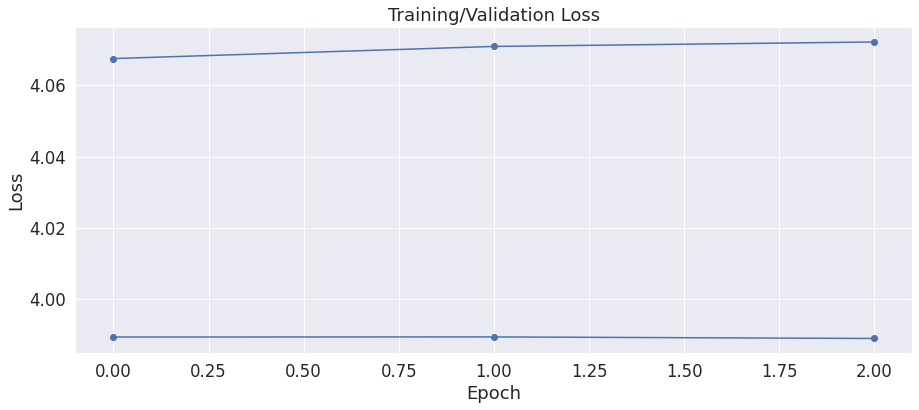

[2021-01-25 14:13:27,347][INFO] ## epoch: best, acc: 0.45331665, f1: 0.24582946, best_f1: 0.24391190



<Figure size 1080x432 with 0 Axes>

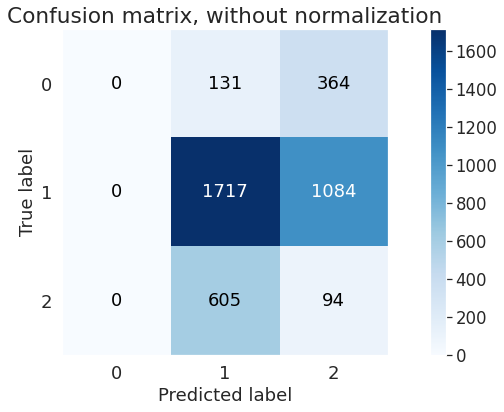

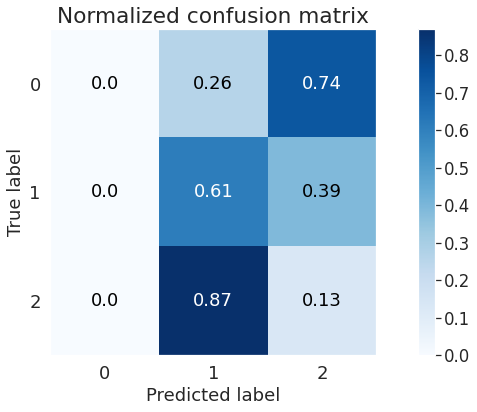

[2021-01-25 14:13:28,280][INFO] ## ================     fold 1        ===============
[2021-01-25 14:13:31,454][INFO] ## ================     epoch 1        ===============


[2021-01-25 14:13:31,817][DEBUG] ## train batch: 0, train_loss: 0.021079

[2021-01-25 14:13:32,145][DEBUG] ## train batch: 1, train_loss: 0.040365

[2021-01-25 14:13:32,477][DEBUG] ## train batch: 2, train_loss: 0.057517

[2021-01-25 14:13:32,807][DEBUG] ## train batch: 3, train_loss: 0.074430

[2021-01-25 14:13:33,135][DEBUG] ## train batch: 4, train_loss: 0.090561

[2021-01-25 14:13:33,467][DEBUG] ## train batch: 5, train_loss: 0.105788

[2021-01-25 14:13:33,795][DEBUG] ## train batch: 6, train_loss: 0.126298

[2021-01-25 14:13:34,122][DEBUG] ## train batch: 7, train_loss: 0.140305

[2021-01-25 14:13:34,455][DEBUG] ## train batch: 8, train_loss: 0.164620

[2021-01-25 14:13:34,783][DEBUG] ## train batch: 9, train_loss: 0.177515

[2021-01-25 14:13:35,111][DEBUG] ## train batch: 10, train_loss: 0.194780

[2021-01-25 14:13:35,439][DEBUG] ## train batch: 11, train_loss: 0.214292

[2021-01-25 14:13:35,768][DEBUG] ## train batch: 12, train_loss: 0.228615

[2021-01-25 14:13:36,097][DEBUG] ##

[2021-01-25 14:16:17,059][DEBUG] ## validation batch: 0, val_loss: 0.05966841888427735, valid_preds_fold: [[9.99742568e-01 2.56806175e-04 5.98310010e-07]
 [9.99753058e-01 2.46340729e-04 5.90025252e-07]
 [9.99760211e-01 2.39202724e-04 6.11162591e-07]
 [9.99735653e-01 2.63720984e-04 6.13669499e-07]
 [9.99638557e-01 3.60940670e-04 5.21983566e-07]
 [9.99703705e-01 2.95630074e-04 6.13863563e-07]
 [9.99737322e-01 2.62114947e-04 5.64176332e-07]
 [9.99637485e-01 3.61993938e-04 5.07407208e-07]
 [9.99722898e-01 2.76442210e-04 5.89851027e-07]
 [9.99732077e-01 2.67262891e-04 5.65893970e-07]
 [9.99753892e-01 2.45486357e-04 5.74841636e-07]
 [9.99717176e-01 2.82168359e-04 6.49165429e-07]
 [9.99734104e-01 2.65264272e-04 6.46461785e-07]
 [9.99741733e-01 2.57630425e-04 5.61522882e-07]
 [9.99724567e-01 2.74920982e-04 5.00725037e-07]
 [9.87844765e-01 6.69779815e-03 5.45738963e-03]
 [9.88740981e-01 6.19044621e-03 5.06848050e-03]
 [9.88638759e-01 6.30468177e-03 5.05653210e-03]
 [9.88215566e-01 6.19352050e-0

[2021-01-25 14:16:36,324][INFO] ## epoch: 0, train loss: 9.03207741, valid loss: 9.32013691, acc: 0.05607009, f1: 0.04253299, best_f1: 0.04253299

[2021-01-25 14:16:36,326][INFO] ## ================     epoch 2        ===============


[2021-01-25 14:16:36,696][DEBUG] ## train batch: 0, train_loss: 0.016270

[2021-01-25 14:16:37,026][DEBUG] ## train batch: 1, train_loss: 0.031716

[2021-01-25 14:16:37,356][DEBUG] ## train batch: 2, train_loss: 0.051518

[2021-01-25 14:16:37,685][DEBUG] ## train batch: 3, train_loss: 0.066013

[2021-01-25 14:16:38,013][DEBUG] ## train batch: 4, train_loss: 0.082512

[2021-01-25 14:16:38,344][DEBUG] ## train batch: 5, train_loss: 0.097958

[2021-01-25 14:16:38,673][DEBUG] ## train batch: 6, train_loss: 0.122208

[2021-01-25 14:16:39,004][DEBUG] ## train batch: 7, train_loss: 0.138986

[2021-01-25 14:16:39,332][DEBUG] ## train batch: 8, train_loss: 0.158647

[2021-01-25 14:16:39,660][DEBUG] ## train batch: 9, train_loss: 0.175711

[2021-01-25 14:16:39,987][DEBUG] ## train batch: 10, train_loss: 0.191442

[2021-01-25 14:16:40,317][DEBUG] ## train batch: 11, train_loss: 0.213321

[2021-01-25 14:16:40,646][DEBUG] ## train batch: 12, train_loss: 0.231450

[2021-01-25 14:16:40,976][DEBUG] ##

[2021-01-25 14:19:21,952][DEBUG] ## validation batch: 0, val_loss: 0.059783576965332035, valid_preds_fold: [[9.99759376e-01 2.40061781e-04 6.21357458e-07]
 [9.99736369e-01 2.63033464e-04 6.08045923e-07]
 [9.99747932e-01 2.51446851e-04 6.17534170e-07]
 [9.99731719e-01 2.67718162e-04 6.21739787e-07]
 [9.99620795e-01 3.78526835e-04 5.49364472e-07]
 [9.99730647e-01 2.68826174e-04 5.26916892e-07]
 [9.99739587e-01 2.59801338e-04 5.72575971e-07]
 [9.99731004e-01 2.68431759e-04 5.87151249e-07]
 [9.99724567e-01 2.74773658e-04 6.35310187e-07]
 [9.99740660e-01 2.58775166e-04 5.66766289e-07]
 [9.99750435e-01 2.48947385e-04 6.20909418e-07]
 [9.99734342e-01 2.65087321e-04 5.75782281e-07]
 [9.99707758e-01 2.91640870e-04 5.95726533e-07]
 [9.99729097e-01 2.70242628e-04 6.42592340e-07]
 [9.99650836e-01 3.48648784e-04 4.77968626e-07]
 [9.87170279e-01 8.47162586e-03 4.35802760e-03]
 [9.88512635e-01 5.97566133e-03 5.51173231e-03]
 [9.87930179e-01 6.55418867e-03 5.51571045e-03]
 [9.88613486e-01 6.36756746e-

[2021-01-25 14:19:38,780][INFO] ## epoch: 1, train loss: 9.02852596, valid loss: 9.32007172, acc: 0.05607009, f1: 0.04255723, best_f1: 0.04255723

[2021-01-25 14:19:38,782][INFO] ## ================     epoch 3        ===============


[2021-01-25 14:19:39,135][DEBUG] ## train batch: 0, train_loss: 0.019067

[2021-01-25 14:19:39,464][DEBUG] ## train batch: 1, train_loss: 0.040549

[2021-01-25 14:19:39,797][DEBUG] ## train batch: 2, train_loss: 0.056875

[2021-01-25 14:19:40,128][DEBUG] ## train batch: 3, train_loss: 0.071286

[2021-01-25 14:19:40,461][DEBUG] ## train batch: 4, train_loss: 0.097492

[2021-01-25 14:19:40,791][DEBUG] ## train batch: 5, train_loss: 0.115554

[2021-01-25 14:19:41,124][DEBUG] ## train batch: 6, train_loss: 0.132705

[2021-01-25 14:19:41,456][DEBUG] ## train batch: 7, train_loss: 0.148383

[2021-01-25 14:19:41,787][DEBUG] ## train batch: 8, train_loss: 0.163542

[2021-01-25 14:19:42,118][DEBUG] ## train batch: 9, train_loss: 0.177900

[2021-01-25 14:19:42,451][DEBUG] ## train batch: 10, train_loss: 0.193259

[2021-01-25 14:19:42,783][DEBUG] ## train batch: 11, train_loss: 0.220868

[2021-01-25 14:19:43,115][DEBUG] ## train batch: 12, train_loss: 0.240769

[2021-01-25 14:19:43,447][DEBUG] ##

[2021-01-25 14:22:24,512][DEBUG] ## validation batch: 0, val_loss: 0.059724899291992185, valid_preds_fold: [[9.99729335e-01 2.70067743e-04 6.43172484e-07]
 [9.99740660e-01 2.58779357e-04 6.20740536e-07]
 [9.99741256e-01 2.58125103e-04 5.73777299e-07]
 [9.99730766e-01 2.68788805e-04 4.98058228e-07]
 [9.99719560e-01 2.79671367e-04 6.55877727e-07]
 [9.99707520e-01 2.91756238e-04 6.66978281e-07]
 [9.99728978e-01 2.70408083e-04 5.83074950e-07]
 [9.99746382e-01 2.52987316e-04 5.95783604e-07]
 [9.99628305e-01 3.71139613e-04 5.27808936e-07]
 [9.99718845e-01 2.80586159e-04 6.34307639e-07]
 [9.99710858e-01 2.88471987e-04 6.55459985e-07]
 [9.99735653e-01 2.63680995e-04 5.89034414e-07]
 [9.99747097e-01 2.52247410e-04 5.97815358e-07]
 [9.99720752e-01 2.78603664e-04 6.11910593e-07]
 [9.99745905e-01 2.53468024e-04 6.11903829e-07]
 [9.87964392e-01 7.92823080e-03 4.10741614e-03]
 [9.88638103e-01 5.85707556e-03 5.50489593e-03]
 [9.88134205e-01 6.11328427e-03 5.75250527e-03]
 [9.88684237e-01 6.31285924e-

[2021-01-25 14:22:41,229][INFO] ## epoch: 2, train loss: 9.02614983, valid loss: 9.31554933, acc: 0.05607009, f1: 0.04258150, best_f1: 0.04258150



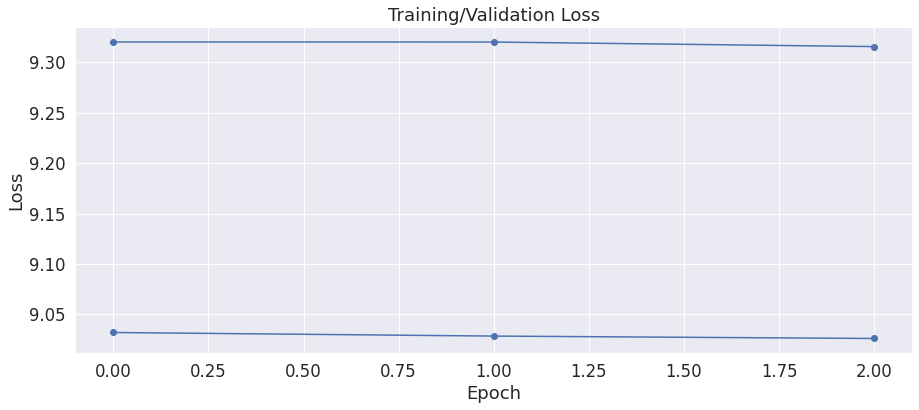

[2021-01-25 14:22:56,937][INFO] ## epoch: best, acc: 0.05607009, f1: 0.04263013, best_f1: 0.04258150



<Figure size 1080x432 with 0 Axes>

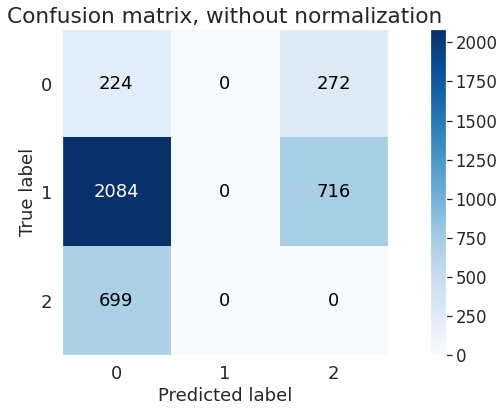

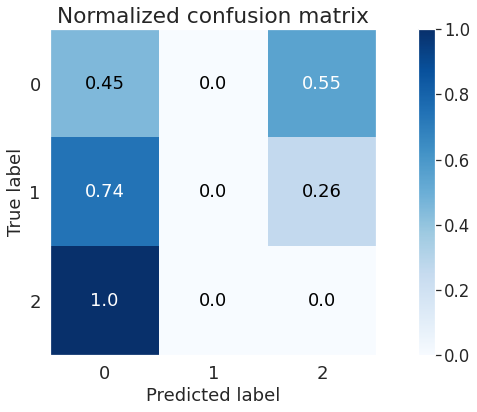

[2021-01-25 14:22:57,510][INFO] ## ================     fold 2        ===============
[2021-01-25 14:23:00,745][INFO] ## ================     epoch 1        ===============


[2021-01-25 14:23:01,095][DEBUG] ## train batch: 0, train_loss: 0.018518

[2021-01-25 14:23:01,432][DEBUG] ## train batch: 1, train_loss: 0.032030

[2021-01-25 14:23:01,763][DEBUG] ## train batch: 2, train_loss: 0.056686

[2021-01-25 14:23:02,096][DEBUG] ## train batch: 3, train_loss: 0.067642

[2021-01-25 14:23:02,428][DEBUG] ## train batch: 4, train_loss: 0.081271

[2021-01-25 14:23:02,759][DEBUG] ## train batch: 5, train_loss: 0.098546

[2021-01-25 14:23:03,093][DEBUG] ## train batch: 6, train_loss: 0.114884

[2021-01-25 14:23:03,425][DEBUG] ## train batch: 7, train_loss: 0.128318

[2021-01-25 14:23:03,757][DEBUG] ## train batch: 8, train_loss: 0.145838

[2021-01-25 14:23:04,090][DEBUG] ## train batch: 9, train_loss: 0.165456

[2021-01-25 14:23:04,423][DEBUG] ## train batch: 10, train_loss: 0.187448

[2021-01-25 14:23:04,755][DEBUG] ## train batch: 11, train_loss: 0.203252

[2021-01-25 14:23:05,087][DEBUG] ## train batch: 12, train_loss: 0.215817

[2021-01-25 14:23:05,420][DEBUG] ##

[2021-01-25 14:25:47,445][DEBUG] ## validation batch: 0, val_loss: 0.036708091735839846, valid_preds_fold: [[9.96329486e-01 3.67047149e-03 2.18689841e-11]
 [9.97002900e-01 2.99708173e-03 1.64269882e-11]
 [9.95958149e-01 4.04186128e-03 1.84945045e-11]
 [9.96519566e-01 3.48044583e-03 1.78708142e-11]
 [9.96155560e-01 3.84443533e-03 1.49737341e-11]
 [9.95560169e-01 4.43981448e-03 3.10828654e-11]
 [9.97149646e-01 2.85036606e-03 2.04807213e-11]
 [9.95482326e-01 4.51763021e-03 2.08261394e-11]
 [9.96417284e-01 3.58266407e-03 1.78293526e-11]
 [9.96116519e-01 3.88350245e-03 1.64098179e-11]
 [9.96158957e-01 3.84102180e-03 1.66357848e-11]
 [9.95966434e-01 4.03353898e-03 2.57777393e-11]
 [9.95104313e-01 4.89572762e-03 3.09326349e-11]
 [9.96758282e-01 3.24172340e-03 1.67376096e-11]
 [6.37669146e-01 3.62328589e-01 2.20932793e-06]
 [6.69900715e-01 3.30097079e-01 2.18665855e-06]
 [6.03723824e-01 3.96274358e-01 1.79421761e-06]
 [6.25467539e-01 3.74530554e-01 1.84376040e-06]
 [9.89332199e-01 1.06677683e-

[2021-01-25 14:26:06,020][INFO] ## epoch: 0, train loss: 8.19308661, valid loss: 8.29478076, acc: 0.18322904, f1: 0.14094450, best_f1: 0.14094450

[2021-01-25 14:26:06,022][INFO] ## ================     epoch 2        ===============


[2021-01-25 14:26:06,403][DEBUG] ## train batch: 0, train_loss: 0.014173

[2021-01-25 14:26:06,737][DEBUG] ## train batch: 1, train_loss: 0.033246

[2021-01-25 14:26:07,069][DEBUG] ## train batch: 2, train_loss: 0.050861

[2021-01-25 14:26:07,402][DEBUG] ## train batch: 3, train_loss: 0.067707

[2021-01-25 14:26:07,734][DEBUG] ## train batch: 4, train_loss: 0.086144

[2021-01-25 14:26:08,066][DEBUG] ## train batch: 5, train_loss: 0.107615

[2021-01-25 14:26:08,400][DEBUG] ## train batch: 6, train_loss: 0.122901

[2021-01-25 14:26:08,733][DEBUG] ## train batch: 7, train_loss: 0.146343

[2021-01-25 14:26:09,066][DEBUG] ## train batch: 8, train_loss: 0.164151

[2021-01-25 14:26:09,399][DEBUG] ## train batch: 9, train_loss: 0.182546

[2021-01-25 14:26:09,732][DEBUG] ## train batch: 10, train_loss: 0.196181

[2021-01-25 14:26:10,067][DEBUG] ## train batch: 11, train_loss: 0.212000

[2021-01-25 14:26:10,400][DEBUG] ## train batch: 12, train_loss: 0.229001

[2021-01-25 14:26:10,735][DEBUG] ##

[2021-01-25 14:28:52,808][DEBUG] ## validation batch: 0, val_loss: 0.03651709747314453, valid_preds_fold: [[9.96768236e-01 3.23177315e-03 2.15960218e-11]
 [9.95042205e-01 4.95778304e-03 3.18811574e-11]
 [9.96508658e-01 3.49132181e-03 1.56691830e-11]
 [9.95435774e-01 4.56420425e-03 2.08730845e-11]
 [9.96044755e-01 3.95528693e-03 1.48161344e-11]
 [9.95827615e-01 4.17240942e-03 2.72508734e-11]
 [9.96530831e-01 3.46918521e-03 2.11317977e-11]
 [9.96463358e-01 3.53672146e-03 2.13149914e-11]
 [9.95284498e-01 4.71545896e-03 2.46061071e-11]
 [9.96294320e-01 3.70565732e-03 1.56792045e-11]
 [9.96311009e-01 3.68901994e-03 1.38254989e-11]
 [9.96090591e-01 3.90940905e-03 2.68010475e-11]
 [9.95929778e-01 4.07020329e-03 2.15718485e-11]
 [9.96754587e-01 3.24544846e-03 1.43237583e-11]
 [6.71787143e-01 3.28210860e-01 2.01910757e-06]
 [6.85098708e-01 3.14899772e-01 1.54090287e-06]
 [5.94323218e-01 4.05675292e-01 1.57238696e-06]
 [6.10822618e-01 3.89175504e-01 1.88247270e-06]
 [9.88451481e-01 1.15485657e-0

[2021-01-25 14:29:07,991][DEBUG] ## train batch: 0, train_loss: 0.016099

[2021-01-25 14:29:08,326][DEBUG] ## train batch: 1, train_loss: 0.027693

[2021-01-25 14:29:08,660][DEBUG] ## train batch: 2, train_loss: 0.037153

[2021-01-25 14:29:08,994][DEBUG] ## train batch: 3, train_loss: 0.055679

[2021-01-25 14:29:09,328][DEBUG] ## train batch: 4, train_loss: 0.074545

[2021-01-25 14:29:09,662][DEBUG] ## train batch: 5, train_loss: 0.090293

[2021-01-25 14:29:09,994][DEBUG] ## train batch: 6, train_loss: 0.107386

[2021-01-25 14:29:10,329][DEBUG] ## train batch: 7, train_loss: 0.126084

[2021-01-25 14:29:10,663][DEBUG] ## train batch: 8, train_loss: 0.145094

[2021-01-25 14:29:10,996][DEBUG] ## train batch: 9, train_loss: 0.163871

[2021-01-25 14:29:11,330][DEBUG] ## train batch: 10, train_loss: 0.179265

[2021-01-25 14:29:11,663][DEBUG] ## train batch: 11, train_loss: 0.199447

[2021-01-25 14:29:11,999][DEBUG] ## train batch: 12, train_loss: 0.214506

[2021-01-25 14:29:12,333][DEBUG] ##

[2021-01-25 14:31:54,494][DEBUG] ## validation batch: 0, val_loss: 0.03666816329956055, valid_preds_fold: [[9.95982170e-01 4.01784247e-03 2.13360527e-11]
 [9.95665848e-01 4.33415174e-03 2.72389628e-11]
 [9.96474683e-01 3.52529553e-03 2.02842413e-11]
 [9.96296942e-01 3.70301050e-03 2.05582339e-11]
 [9.96358573e-01 3.64143751e-03 1.75576255e-11]
 [9.97027457e-01 2.97251856e-03 1.74013252e-11]
 [9.96515870e-01 3.48413968e-03 2.36654134e-11]
 [9.96003330e-01 3.99669120e-03 2.57868085e-11]
 [9.96234119e-01 3.76583938e-03 2.19563274e-11]
 [9.96692777e-01 3.30720632e-03 1.69013328e-11]
 [9.96455729e-01 3.54428496e-03 2.00433732e-11]
 [9.96576488e-01 3.42351384e-03 2.53721419e-11]
 [9.95190978e-01 4.80898749e-03 2.75725554e-11]
 [9.96370673e-01 3.62938177e-03 1.75452517e-11]
 [6.36582434e-01 3.63415390e-01 2.17703951e-06]
 [6.51064813e-01 3.48933488e-01 1.72140835e-06]
 [6.49714172e-01 3.50284308e-01 1.57022146e-06]
 [6.35144234e-01 3.64853740e-01 2.03231957e-06]
 [9.88711715e-01 1.12882536e-0

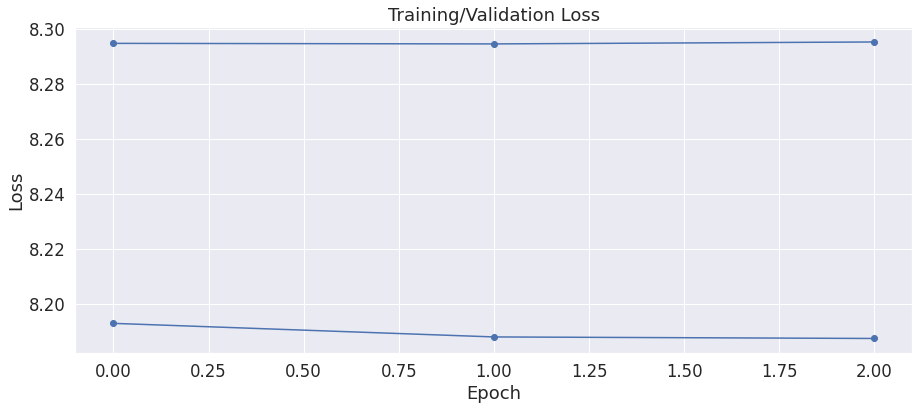

[2021-01-25 14:32:24,948][INFO] ## epoch: best, acc: 0.18222778, f1: 0.14009152, best_f1: 0.14094450



<Figure size 1080x432 with 0 Axes>

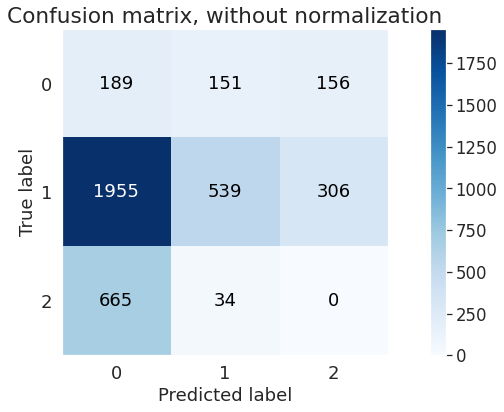

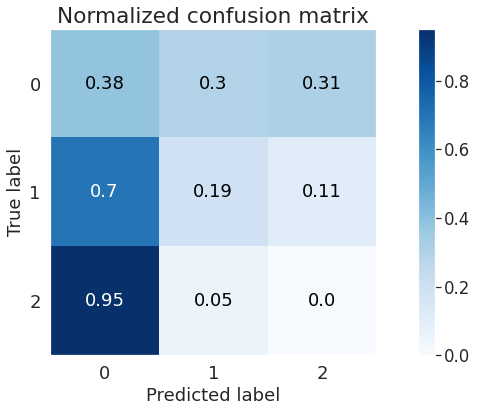

[2021-01-25 14:32:25,457][INFO] ## ================     fold 3        ===============
[2021-01-25 14:32:28,667][INFO] ## ================     epoch 1        ===============


[2021-01-25 14:32:29,036][DEBUG] ## train batch: 0, train_loss: 0.024011

[2021-01-25 14:32:29,366][DEBUG] ## train batch: 1, train_loss: 0.041826

[2021-01-25 14:32:29,699][DEBUG] ## train batch: 2, train_loss: 0.062400

[2021-01-25 14:32:30,032][DEBUG] ## train batch: 3, train_loss: 0.084920

[2021-01-25 14:32:30,365][DEBUG] ## train batch: 4, train_loss: 0.108049

[2021-01-25 14:32:30,694][DEBUG] ## train batch: 5, train_loss: 0.126107

[2021-01-25 14:32:31,028][DEBUG] ## train batch: 6, train_loss: 0.150233

[2021-01-25 14:32:31,358][DEBUG] ## train batch: 7, train_loss: 0.173159

[2021-01-25 14:32:31,688][DEBUG] ## train batch: 8, train_loss: 0.196168

[2021-01-25 14:32:32,019][DEBUG] ## train batch: 9, train_loss: 0.220907

[2021-01-25 14:32:32,348][DEBUG] ## train batch: 10, train_loss: 0.241779

[2021-01-25 14:32:32,680][DEBUG] ## train batch: 11, train_loss: 0.264852

[2021-01-25 14:32:33,009][DEBUG] ## train batch: 12, train_loss: 0.293863

[2021-01-25 14:32:33,341][DEBUG] ##

[2021-01-25 14:35:14,863][DEBUG] ## validation batch: 0, val_loss: 0.14145077514648438, valid_preds_fold: [[9.99937296e-01 3.24145544e-10 6.26807814e-05]
 [9.99924660e-01 3.69480696e-10 7.53535496e-05]
 [9.99901056e-01 3.82668175e-10 9.88974862e-05]
 [9.99921918e-01 3.35445643e-10 7.80799819e-05]
 [9.99887943e-01 4.12337831e-10 1.12067057e-04]
 [9.99918222e-01 2.62804667e-10 8.17580076e-05]
 [9.99566019e-01 1.23709024e-05 4.21630975e-04]
 [9.99629498e-01 1.10227120e-05 3.59542377e-04]
 [9.99603450e-01 1.11949457e-05 3.85334570e-04]
 [9.99611676e-01 1.33756866e-05 3.74985917e-04]
 [9.99643683e-01 1.50002516e-05 3.41274572e-04]
 [9.99593079e-01 1.51684444e-05 3.91772628e-04]
 [9.99630094e-01 1.00681273e-05 3.59822181e-04]
 [9.99670744e-01 1.18579110e-05 3.17299186e-04]
 [9.99620199e-01 1.41733017e-05 3.65582906e-04]
 [9.99712646e-01 6.17909990e-09 2.87353614e-04]
 [9.99764144e-01 5.23571853e-09 2.35815183e-04]
 [9.99757826e-01 4.86650364e-09 2.42123380e-04]
 [9.99800980e-01 4.75414863e-0

[2021-01-25 14:35:33,669][INFO] ## epoch: 0, train loss: 11.63355485, valid loss: 11.63970797, acc: 0.20801001, f1: 0.15377752, best_f1: 0.15377752

[2021-01-25 14:35:33,671][INFO] ## ================     epoch 2        ===============


[2021-01-25 14:35:34,034][DEBUG] ## train batch: 0, train_loss: 0.023126

[2021-01-25 14:35:34,365][DEBUG] ## train batch: 1, train_loss: 0.047327

[2021-01-25 14:35:34,698][DEBUG] ## train batch: 2, train_loss: 0.065695

[2021-01-25 14:35:35,029][DEBUG] ## train batch: 3, train_loss: 0.089086

[2021-01-25 14:35:35,360][DEBUG] ## train batch: 4, train_loss: 0.112084

[2021-01-25 14:35:35,690][DEBUG] ## train batch: 5, train_loss: 0.134350

[2021-01-25 14:35:36,024][DEBUG] ## train batch: 6, train_loss: 0.156767

[2021-01-25 14:35:36,356][DEBUG] ## train batch: 7, train_loss: 0.178006

[2021-01-25 14:35:36,691][DEBUG] ## train batch: 8, train_loss: 0.202449

[2021-01-25 14:35:37,022][DEBUG] ## train batch: 9, train_loss: 0.222627

[2021-01-25 14:35:37,354][DEBUG] ## train batch: 10, train_loss: 0.246540

[2021-01-25 14:35:37,686][DEBUG] ## train batch: 11, train_loss: 0.268233

[2021-01-25 14:35:38,019][DEBUG] ## train batch: 12, train_loss: 0.286996

[2021-01-25 14:35:38,353][DEBUG] ##

[2021-01-25 14:38:19,956][DEBUG] ## validation batch: 0, val_loss: 0.14133088684082032, valid_preds_fold: [[9.99915004e-01 3.88868049e-10 8.49825010e-05]
 [9.99910474e-01 4.05588979e-10 8.95396224e-05]
 [9.99914527e-01 4.13762996e-10 8.54824466e-05]
 [9.99920607e-01 3.29994615e-10 7.93832369e-05]
 [9.99924898e-01 3.34570621e-10 7.51256812e-05]
 [9.99925613e-01 3.34139744e-10 7.43879864e-05]
 [9.99650121e-01 1.24016060e-05 3.37449630e-04]
 [9.99518514e-01 1.35211021e-05 4.68049780e-04]
 [9.99561965e-01 1.26674922e-05 4.25415463e-04]
 [9.99668837e-01 1.01060159e-05 3.21085652e-04]
 [9.99671340e-01 1.13459701e-05 3.17305414e-04]
 [9.99648571e-01 1.19025708e-05 3.39521648e-04]
 [9.99575555e-01 1.51799877e-05 4.09304834e-04]
 [9.99649167e-01 1.23630380e-05 3.38393671e-04]
 [9.99567807e-01 1.29400851e-05 4.19236603e-04]
 [9.99766529e-01 5.28187005e-09 2.33460378e-04]
 [9.99777496e-01 5.46364509e-09 2.22480594e-04]
 [9.99783099e-01 5.85156990e-09 2.16864515e-04]
 [9.99689102e-01 6.17460660e-0

[2021-01-25 14:38:35,160][DEBUG] ## train batch: 0, train_loss: 0.016806

[2021-01-25 14:38:35,491][DEBUG] ## train batch: 1, train_loss: 0.043239

[2021-01-25 14:38:35,823][DEBUG] ## train batch: 2, train_loss: 0.060576

[2021-01-25 14:38:36,154][DEBUG] ## train batch: 3, train_loss: 0.082109

[2021-01-25 14:38:36,487][DEBUG] ## train batch: 4, train_loss: 0.106615

[2021-01-25 14:38:36,819][DEBUG] ## train batch: 5, train_loss: 0.132785

[2021-01-25 14:38:37,151][DEBUG] ## train batch: 6, train_loss: 0.156487

[2021-01-25 14:38:37,483][DEBUG] ## train batch: 7, train_loss: 0.176598

[2021-01-25 14:38:37,817][DEBUG] ## train batch: 8, train_loss: 0.199228

[2021-01-25 14:38:38,148][DEBUG] ## train batch: 9, train_loss: 0.225964

[2021-01-25 14:38:38,482][DEBUG] ## train batch: 10, train_loss: 0.254847

[2021-01-25 14:38:38,814][DEBUG] ## train batch: 11, train_loss: 0.279204

[2021-01-25 14:38:39,145][DEBUG] ## train batch: 12, train_loss: 0.302698

[2021-01-25 14:38:39,476][DEBUG] ##

[2021-01-25 14:41:21,075][DEBUG] ## validation batch: 0, val_loss: 0.14154122924804688, valid_preds_fold: [[9.99913692e-01 4.03881151e-10 8.63371388e-05]
 [9.99917746e-01 3.80381560e-10 8.22127913e-05]
 [9.99906778e-01 4.45904619e-10 9.32495532e-05]
 [9.99915361e-01 3.29497929e-10 8.46415278e-05]
 [9.99923944e-01 3.52915919e-10 7.60996481e-05]
 [9.99919653e-01 2.78471496e-10 8.03477087e-05]
 [9.99581993e-01 1.13255201e-05 4.06726875e-04]
 [9.99572814e-01 1.19302031e-05 4.15214978e-04]
 [9.99605119e-01 1.38527184e-05 3.81069316e-04]
 [9.99616265e-01 1.10387455e-05 3.72671231e-04]
 [9.99578893e-01 1.23032560e-05 4.08838823e-04]
 [9.99607027e-01 1.14022405e-05 3.81565362e-04]
 [9.99603689e-01 1.17518684e-05 3.84550134e-04]
 [9.99652028e-01 1.21678268e-05 3.35803692e-04]
 [9.99654651e-01 1.25729312e-05 3.32748168e-04]
 [9.99768913e-01 5.45160583e-09 2.31057245e-04]
 [9.99784291e-01 4.47298243e-09 2.15708642e-04]
 [9.99793470e-01 4.81324580e-09 2.06518933e-04]
 [9.99756277e-01 5.41093970e-0

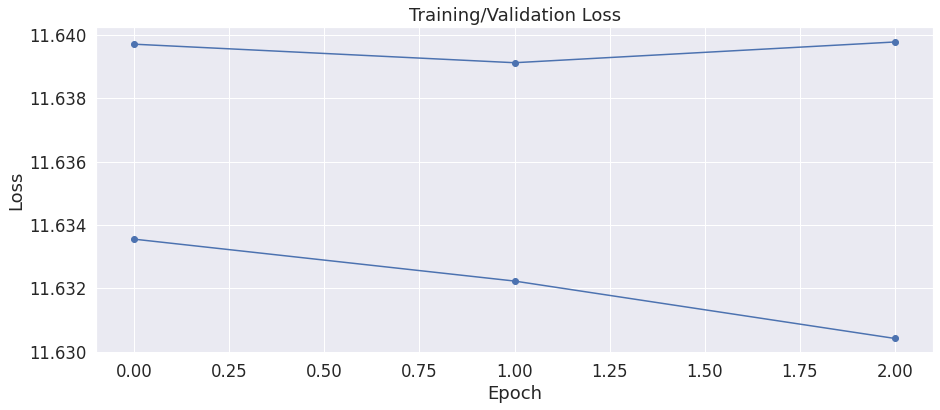

[2021-01-25 14:41:52,202][INFO] ## epoch: best, acc: 0.20801001, f1: 0.15376675, best_f1: 0.15377752



<Figure size 1080x432 with 0 Axes>

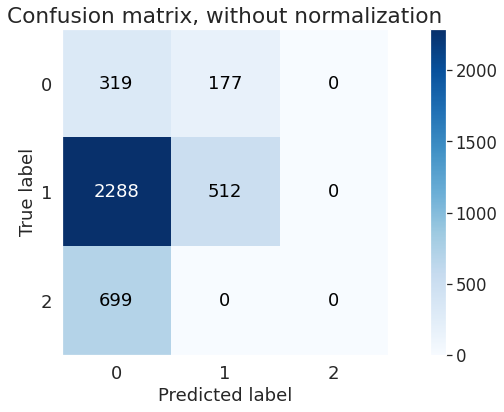

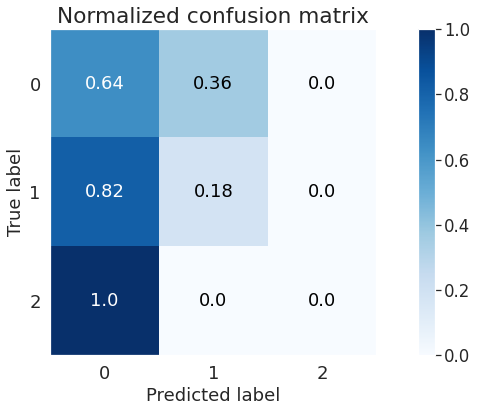

[2021-01-25 14:41:52,700][INFO] ## ================     fold 4        ===============
[2021-01-25 14:41:55,844][INFO] ## ================     epoch 1        ===============


[2021-01-25 14:41:56,195][DEBUG] ## train batch: 0, train_loss: 0.015378

[2021-01-25 14:41:56,526][DEBUG] ## train batch: 1, train_loss: 0.027344

[2021-01-25 14:41:56,857][DEBUG] ## train batch: 2, train_loss: 0.038618

[2021-01-25 14:41:57,188][DEBUG] ## train batch: 3, train_loss: 0.051014

[2021-01-25 14:41:57,519][DEBUG] ## train batch: 4, train_loss: 0.066389

[2021-01-25 14:41:57,850][DEBUG] ## train batch: 5, train_loss: 0.078178

[2021-01-25 14:41:58,181][DEBUG] ## train batch: 6, train_loss: 0.091989

[2021-01-25 14:41:58,514][DEBUG] ## train batch: 7, train_loss: 0.102568

[2021-01-25 14:41:58,845][DEBUG] ## train batch: 8, train_loss: 0.114040

[2021-01-25 14:41:59,177][DEBUG] ## train batch: 9, train_loss: 0.126632

[2021-01-25 14:41:59,507][DEBUG] ## train batch: 10, train_loss: 0.138363

[2021-01-25 14:41:59,836][DEBUG] ## train batch: 11, train_loss: 0.152492

[2021-01-25 14:42:00,169][DEBUG] ## train batch: 12, train_loss: 0.161979

[2021-01-25 14:42:00,500][DEBUG] ##

[2021-01-25 14:44:41,755][DEBUG] ## validation batch: 0, val_loss: 0.06776714324951172, valid_preds_fold: [[9.83189583e-01 5.89758165e-05 1.67514812e-02]
 [9.82569337e-01 5.99079358e-05 1.73708647e-02]
 [9.83326852e-01 5.36998486e-05 1.66194160e-02]
 [9.84494269e-01 6.42824525e-05 1.54414419e-02]
 [9.81146574e-01 6.13203956e-05 1.87921580e-02]
 [9.81180429e-01 5.97417784e-05 1.87597517e-02]
 [9.83321309e-01 6.32729934e-05 1.66153442e-02]
 [9.81963158e-01 6.18989798e-05 1.79749075e-02]
 [9.79167938e-01 6.62726379e-05 2.07658056e-02]
 [9.83219087e-01 5.75274207e-05 1.67233944e-02]
 [9.82458413e-01 6.37083649e-05 1.74778569e-02]
 [9.81505871e-01 6.45224281e-05 1.84295792e-02]
 [9.81344342e-01 5.98007864e-05 1.85958967e-02]
 [7.48710454e-01 2.60981033e-03 2.48679653e-01]
 [7.91220248e-01 1.76597445e-03 2.07013831e-01]
 [7.44941354e-01 2.84065027e-03 2.52218008e-01]
 [7.44117200e-01 2.73849699e-03 2.53144264e-01]
 [7.35466421e-01 2.93911737e-03 2.61594445e-01]
 [7.43869364e-01 2.62043439e-0

[2021-01-25 14:45:00,200][INFO] ## epoch: 0, train loss: 6.25949855, valid loss: 6.30496174, acc: 0.05833751, f1: 0.05692153, best_f1: 0.05692153

[2021-01-25 14:45:00,222][INFO] ## ================     epoch 2        ===============


[2021-01-25 14:45:00,594][DEBUG] ## train batch: 0, train_loss: 0.013733

[2021-01-25 14:45:00,927][DEBUG] ## train batch: 1, train_loss: 0.028108

[2021-01-25 14:45:01,260][DEBUG] ## train batch: 2, train_loss: 0.042787

[2021-01-25 14:45:01,592][DEBUG] ## train batch: 3, train_loss: 0.054227

[2021-01-25 14:45:01,925][DEBUG] ## train batch: 4, train_loss: 0.067588

[2021-01-25 14:45:02,258][DEBUG] ## train batch: 5, train_loss: 0.079639

[2021-01-25 14:45:02,590][DEBUG] ## train batch: 6, train_loss: 0.092329

[2021-01-25 14:45:02,918][DEBUG] ## train batch: 7, train_loss: 0.102717

[2021-01-25 14:45:03,248][DEBUG] ## train batch: 8, train_loss: 0.115148

[2021-01-25 14:45:03,579][DEBUG] ## train batch: 9, train_loss: 0.125747

[2021-01-25 14:45:03,909][DEBUG] ## train batch: 10, train_loss: 0.138053

[2021-01-25 14:45:04,240][DEBUG] ## train batch: 11, train_loss: 0.149357

[2021-01-25 14:45:04,571][DEBUG] ## train batch: 12, train_loss: 0.161972

[2021-01-25 14:45:04,902][DEBUG] ##

[2021-01-25 14:47:46,226][DEBUG] ## validation batch: 0, val_loss: 0.06769671630859375, valid_preds_fold: [[9.82726097e-01 5.61984489e-05 1.72176659e-02]
 [9.81305540e-01 6.25538087e-05 1.86318718e-02]
 [9.81916487e-01 6.09017479e-05 1.80226117e-02]
 [9.80763912e-01 6.17510232e-05 1.91743150e-02]
 [9.83100653e-01 5.65177943e-05 1.68429203e-02]
 [9.81362700e-01 6.01873107e-05 1.85771361e-02]
 [9.83415067e-01 5.68944670e-05 1.65281370e-02]
 [9.81903076e-01 6.58332647e-05 1.80312023e-02]
 [9.83197331e-01 6.15710451e-05 1.67412013e-02]
 [9.81721520e-01 6.25069588e-05 1.82160381e-02]
 [9.81464803e-01 6.03707558e-05 1.84748583e-02]
 [9.84035313e-01 5.40231085e-05 1.59106385e-02]
 [9.84842777e-01 4.28094681e-05 1.51143409e-02]
 [7.35617518e-01 2.69596931e-03 2.61686474e-01]
 [7.74376869e-01 2.61436822e-03 2.23008737e-01]
 [7.44551122e-01 2.70572491e-03 2.52743185e-01]
 [7.29040980e-01 2.95575731e-03 2.68003225e-01]
 [7.42099524e-01 2.64215656e-03 2.55258292e-01]
 [7.40371227e-01 2.51194392e-0

[2021-01-25 14:48:01,430][DEBUG] ## train batch: 0, train_loss: 0.011439

[2021-01-25 14:48:01,761][DEBUG] ## train batch: 1, train_loss: 0.024584

[2021-01-25 14:48:02,091][DEBUG] ## train batch: 2, train_loss: 0.037330

[2021-01-25 14:48:02,422][DEBUG] ## train batch: 3, train_loss: 0.049494

[2021-01-25 14:48:02,752][DEBUG] ## train batch: 4, train_loss: 0.062078

[2021-01-25 14:48:03,082][DEBUG] ## train batch: 5, train_loss: 0.076070

[2021-01-25 14:48:03,413][DEBUG] ## train batch: 6, train_loss: 0.089113

[2021-01-25 14:48:03,745][DEBUG] ## train batch: 7, train_loss: 0.101445

[2021-01-25 14:48:04,077][DEBUG] ## train batch: 8, train_loss: 0.114812

[2021-01-25 14:48:04,408][DEBUG] ## train batch: 9, train_loss: 0.129017

[2021-01-25 14:48:04,739][DEBUG] ## train batch: 10, train_loss: 0.140405

[2021-01-25 14:48:05,071][DEBUG] ## train batch: 11, train_loss: 0.151785

[2021-01-25 14:48:05,403][DEBUG] ## train batch: 12, train_loss: 0.166507

[2021-01-25 14:48:05,735][DEBUG] ##

[2021-01-25 14:50:47,095][DEBUG] ## validation batch: 0, val_loss: 0.06758693695068359, valid_preds_fold: [[9.79273438e-01 6.37276971e-05 2.06628833e-02]
 [9.80708301e-01 6.70220179e-05 1.92246977e-02]
 [9.83641982e-01 5.97552462e-05 1.62982624e-02]
 [9.81290758e-01 6.10700881e-05 1.86481755e-02]
 [9.82386947e-01 6.21336803e-05 1.75509267e-02]
 [9.81870770e-01 6.12246076e-05 1.80680137e-02]
 [9.82337952e-01 5.91028547e-05 1.76028851e-02]
 [9.81775761e-01 6.21133877e-05 1.81621071e-02]
 [9.82840538e-01 5.60953777e-05 1.71032902e-02]
 [9.79695916e-01 5.96169266e-05 2.02445537e-02]
 [9.81650054e-01 6.26456240e-05 1.82873979e-02]
 [9.84193146e-01 5.43490314e-05 1.57524887e-02]
 [9.81742859e-01 6.07441725e-05 1.81963816e-02]
 [7.27488160e-01 2.67871143e-03 2.69833118e-01]
 [7.29819894e-01 2.79287877e-03 2.67387241e-01]
 [7.42417514e-01 2.77747400e-03 2.54804999e-01]
 [7.24663258e-01 2.74897460e-03 2.72587776e-01]
 [7.32320309e-01 2.98798596e-03 2.64691740e-01]
 [7.37875283e-01 2.58972985e-0

[2021-01-25 14:51:03,698][INFO] ## epoch: 2, train loss: 6.25579837, valid loss: 6.30316868, acc: 0.05858788, f1: 0.05699970, best_f1: 0.05699970



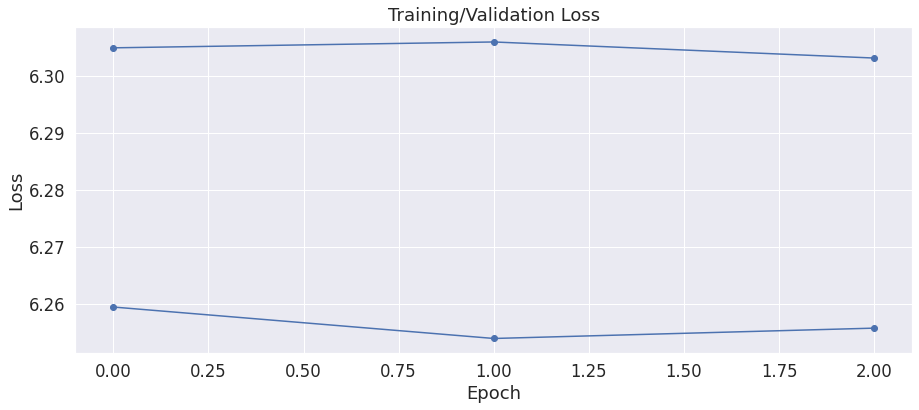

[2021-01-25 14:51:19,531][INFO] ## epoch: best, acc: 0.06134201, f1: 0.05967594, best_f1: 0.05699970



<Figure size 1080x432 with 0 Axes>

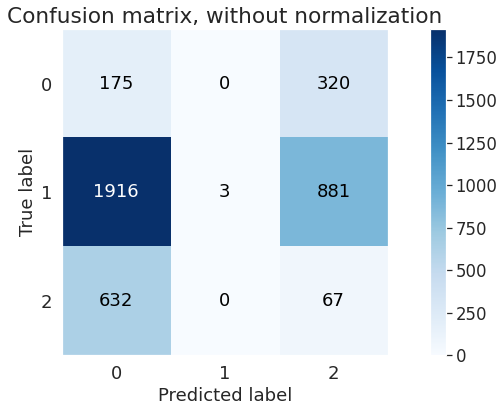

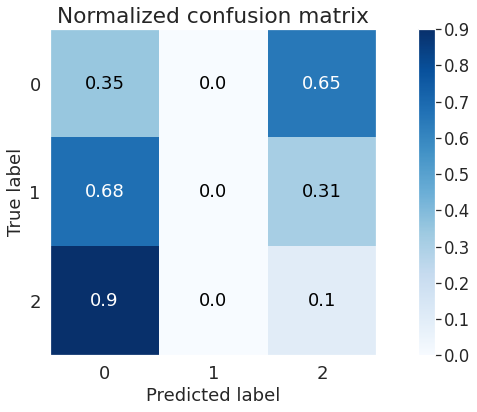

<Figure size 1080x432 with 0 Axes>

In [ ]:
if use_skf:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  
    for fold, (train_indices, valid_indices) in enumerate(skf.split(train_valid_labels, train_valid_labels)):
        train_bert(fold, train_indices, valid_indices)

else:
    train_ratio = 0.7
    train_indices = np.arange(0, int(len(train_valid_labels)*train_ratio))
    valid_indices = np.arange(int(len(train_valid_labels)*train_ratio), len(train_valid_labels))

    train_bert(0, train_indices, valid_indices)
    # print('train_indices', train_indices)
    # print('valid_indices', valid_indices)


In [ ]:
# Execute only when all folds have been performed
logger.info(f1_score(train_labels, np.argmax(oof_train, axis=1), average='macro'))
split_train_df['pred_target'] = np.argmax(oof_train, axis=1)
split_train_df['pred_target_lower'] = oof_train[:,0]
split_train_df['pred_target_hold'] = oof_train[:,1]
split_train_df['pred_target_raise'] = oof_train[:,2]
split_train_df.head()


[2021-01-25 14:51:20,151][INFO] ## 0.15943325041593778


target  prev_decision  ...  pred_target_hold  pred_target_raise
0       1              1  ...          0.000272       6.063129e-07
1       1              1  ...          0.000271       6.011386e-07
2       1              1  ...          0.003525       1.788829e-11
3       1              1  ...          0.000266       5.886656e-07
4       1              1  ...          0.003976       2.512152e-11

[5 rows x 18 columns]

## **Save Data**

In [ ]:
if IN_COLAB:
  def save_data(df, file_name, dir_name=train_dir, index_csv=True):
    if not os.path.exists(dir_name):
      os.mkdir(dir_name)
    # Save results to a picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))

else:
  def save_data(df, file_name, dir_name=train_dir, index_csv=True):
    # Save results to a .picke file
    file = open(dir_name + file_name + '.pickle', 'wb')
    pickle.dump(df, file)
    file.close()
    print('Successfully saved {}.pickle. in {}'.format(file_name, dir_name + file_name + '.pickle'))
    # Save results to a .csv file
    df.to_csv(dir_name + file_name + '.csv', index=index_csv)
    print('Successfully saved {}.csv. in {}'.format(file_name, dir_name + file_name + '.csv'))


In [ ]:
# Save text data (very large files)
save_data(train_df, 'train_df')
save_data(text_df, 'text_df')
save_data(split_train_df, 'split_train_df')


Successfully saved train_df.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/train_df.pickle
Successfully saved train_df.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/train_df.csv
Successfully saved text_df.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/text_df.pickle
Successfully saved text_df.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/text_df.csv
Successfully saved split_train_df.pickle. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/split_train_df.pickle
Successfully saved split_train_df.csv. in /content/drive/My Drive/Colab Notebooks/proj2/src/data/train_data/split_train_df.csv
